# DeFi Metaverse coins Risk Modeling by LSTM(RNN)

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data  Tranformation: Collecting all 198 coins historical data in one df

In [3]:
import os
import pandas as pd

# Specify the folder path containing the CSV files
folder_path = "/content/drive/MyDrive/Metaverse coins"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Create an empty list to store DataFrames
dfs = []

# Iterate through each CSV file and read it into a Pandas DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)

    # Add a new column with the file name
    df['file_name'] = csv_file

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Now you have a single DataFrame (final_df) with an additional 'file_name' column
# indicating the source file for each row
print("Final DataFrame:")
print(final_df.head())


Final DataFrame:
         Date      Open      High       Low     Close   Volume Currency  \
0  2020-09-11  2.138889  2.178425  2.132622  2.162729  34980.0      USD   
1  2020-09-12  2.162915  2.189050  2.128301  2.131183  39097.0      USD   
2  2020-09-13  2.133411  2.173310  2.111417  2.139958  36424.0      USD   
3  2020-09-14  2.140573  2.205897  2.123999  2.159420  35132.0      USD   
4  2020-09-15  2.159420  2.184382  2.102956  2.142319  38755.0      USD   

      file_name Coin Symbol Price Dataset availability  
0  Metafity.csv  NaN    NaN   NaN                  NaN  
1  Metafity.csv  NaN    NaN   NaN                  NaN  
2  Metafity.csv  NaN    NaN   NaN                  NaN  
3  Metafity.csv  NaN    NaN   NaN                  NaN  
4  Metafity.csv  NaN    NaN   NaN                  NaN  


In [4]:
final_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency',
       'file_name', 'Coin', 'Symbol', 'Price', 'Dataset availability'],
      dtype='object')

In [5]:
# prompt: final_df.drop(['Coin', 'Symbol', 'Price', 'Dataset availability'])

final_df.drop(['Coin', 'Symbol', 'Price', 'Dataset availability'], axis=1, inplace=True)


In [6]:
final_df

,Date,Open,High,Low,Close,Volume,Currency,file_name
0,2020-09-11,2.138889,2.178425,2.132622,2.162729,34980.0,USD,Metafity.csv
1,2020-09-12,2.162915,2.189050,2.128301,2.131183,39097.0,USD,Metafity.csv
2,2020-09-13,2.133411,2.173310,2.111417,2.139958,36424.0,USD,Metafity.csv
3,2020-09-14,2.140573,2.205897,2.123999,2.159420,35132.0,USD,Metafity.csv
4,2020-09-15,2.159420,2.184382,2.102956,2.142319,38755.0,USD,Metafity.csv
...,...,...,...,...,...,...,...,...
124489,2022-07-06,0.000409,0.000469,0.000307,0.000418,10696.0,USD,ZENFI AI.csv
124490,2022-07-07,0.000418,0.000428,0.000328,0.000348,4929.0,USD,ZENFI AI.csv
124491,2022-07-08,0.000348,0.000400,0.000282,0.000340,4881.0,USD,ZENFI AI.csv
124492,2022-07-09,0.000340,0.000456,0.000271,0.000342,5979.0,USD,ZENFI AI.csv


In [7]:
final_df['file_name'] = final_df['file_name'].str.split(' ').str[0]

In [8]:
final_df['file_name'] = final_df['file_name'].str.replace('.csv', '')

<ipython-input-8-748335e6710e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_df['file_name'] = final_df['file_name'].str.replace('.csv', '')


## Exploratory Data Analysis

In [9]:
final_df['file_name'].unique()

array(['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtE

In [10]:
df=final_df

In [11]:
df

,Date,Open,High,Low,Close,Volume,Currency,file_name
0,2020-09-11,2.138889,2.178425,2.132622,2.162729,34980.0,USD,Metafity
1,2020-09-12,2.162915,2.189050,2.128301,2.131183,39097.0,USD,Metafity
2,2020-09-13,2.133411,2.173310,2.111417,2.139958,36424.0,USD,Metafity
3,2020-09-14,2.140573,2.205897,2.123999,2.159420,35132.0,USD,Metafity
4,2020-09-15,2.159420,2.184382,2.102956,2.142319,38755.0,USD,Metafity
...,...,...,...,...,...,...,...,...
124489,2022-07-06,0.000409,0.000469,0.000307,0.000418,10696.0,USD,ZENFI
124490,2022-07-07,0.000418,0.000428,0.000328,0.000348,4929.0,USD,ZENFI
124491,2022-07-08,0.000348,0.000400,0.000282,0.000340,4881.0,USD,ZENFI
124492,2022-07-09,0.000340,0.000456,0.000271,0.000342,5979.0,USD,ZENFI


In [ ]:
df['file_name'].nunique()

318

In [ ]:
df['Date'].nunique()

1705

In [12]:
df['Date'].unique()

array(['2020-09-11', '2020-09-12', '2020-09-13', ..., '2020-09-09',
       '2020-09-10', nan], dtype=object)

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df['Date'].dt.year.unique()

array([2020, 2021, 2022, 2017, 2018, 2019])

In [29]:
df['Date'].dt.month.unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8])

In [30]:
df['Date'].dt.day.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 31])

In [31]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
coins       0
dtype: int64

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency',
       'file_name'],
      dtype='object')

In [19]:
df.rename(columns={'file_name': 'coins'}, inplace=True)

In [20]:
coins=['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtEM', 'Somnium', 'MetaSpace', 'Cens', 'Arker',
       'PlayDapp', 'MetaMounts', 'POLYSPORTS', 'Play', 'Bullieverse',
       'Multiverse', 'ETHEKing', 'Defina', 'LuckyMeta', 'Metagalaxy',
       'Shibnobi', 'Strip', 'DNAxCAT', 'AstroGrow', 'SIF', 'MStation',
       'The', 'Affyn', 'MetaVPad', 'Heroes', 'Moon', 'Islandswap',
       'American', 'Laqira', 'Altura', 'FunFi', 'Huny', 'Lovelace', 'ALI',
       'Jenny', 'MetaUFO', 'FlappyDoge', 'StarLink', 'DeepSpace',
       'KlayCity', 'Cats', 'CropBytes', 'Cardiocoin', 'Aavegotchi',
       'Mist', 'Kryxivia', 'Enjin', 'Krypto', 'GameCredits', 'Onston',
       'Kawaii', '9D', 'SpaceFalcon', 'Playermon', 'GridZone.io',
       'MeganSwap', 'Content', 'Lego', 'Decentral', 'MetaWars',
       'LambSwap', 'BODA', 'OneRare', 'ASIX', 'Polytrade', 'Propel',
       'SOMESING', 'Ancient', 'DeHorizon', 'Lepasa', 'AdShares', 'SIDUS',
       'H3RO3S', 'HyperVerse', 'Spheroid', 'MetaMerge', 'MARS4', 'Duckie',
       '7Pixels', 'CyberDragon', 'ClassicDoge', 'Solice', 'DeFi', 'Bean',
       'RaceFi', 'Graviton', 'Puzzle', 'Efinity', 'BoomSpace', 'Rangers',
       'Magic', 'Sinverse', 'Crystal', 'Metagochi', 'Metaverse-Dao',
       'KAKA', 'Shirtum', 'Netvrk', 'GalaxyPad', 'Epik', 'LOCGame', 'OVR',
       'MetaOneVerse', 'SatoshiCity', 'Flokimooni', 'Luffy', 'Hydraverse',
       'SolDate', 'DEEPSPACE', 'PolkaWar', 'Aurory', 'CryptoWar',
       'Binopoly', '1BOX', 'Lelouch', 'Torum', 'MyWorld', 'Bloktopia',
       'RMRK', 'Axie', 'Radio', 'StarSharks', 'Metawear', 'Nano', 'SPACE',
       'MagicBox', 'Metagames', 'Fellaz', 'NELO', 'Karmaverse',
       'FireStarter', 'Astro', 'Star', 'Black', 'HydraMeta', 'Neos',
       'Adroverse', 'KingdomX', 'Doecoin', 'OneArt', 'Fashion', 'ELEF',
       'Planet', 'ARize', 'Age', 'NextEarth', 'Boson', 'Chronicle',
       'Meland.ai', 'FidoMeta', 'MINE', 'Ark', 'FaraLand', 'Endless',
       'Sway', 'Equilibrium', 'Avocado', 'LogiTron', 'Elvantis',
       'Cryptopolis', 'Burn', 'Metapad', 'Crypto', 'Gametree', 'Kalissa',
       'Dragon', 'ENTERBUTTON', 'Moniwar', 'Qfora', 'Sekuya', 'MangaMon',
       'Medacoin', 'Avaxtars', 'Sakura', 'Metabank', 'GameStar', 'Ludena',
       'DoKEN', 'CryptoPlanes', 'Realy', 'PolkaCity', 'CEEK', 'Elemon',
       'Enjinstarter', 'Meli', 'MooMonster', 'SIGNIN', 'TomTom',
       'MetaShib', 'AcknoLedger', 'LaEeb', 'MetaFabric', 'Fistiana',
       'Hellsing', 'Crabada', 'Kalao', 'BITMIC', 'Monsta', 'DragonMaster',
       'KeySwap', 'CryptoCars', 'CronosVerse', 'Legend', 'Chimeras',
       'MetaCos', 'HappyLand', 'SHILL', 'WidiLand', 'Tower', 'Town',
       'Vault', 'Wilder', 'Zone', 'X', 'Victoria', 'Virtual', 'Verasity',
       'Xaya', 'WEMIX', 'VCGamers', 'Velhalla', 'VR', 'Totem',
       'XCarnival', 'Yield', 'Warena', 'UFO', 'Vulcan', 'Wonderman',
       'Wakanda', 'Wizardia', 'bePAY', 'UniX', 'XRUN', 'Vita', 'vEmpire',
       'ZENFI']
columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
for coin in coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Iterate through columns and replace missing values with the mean
    for column in columns:
        mean_value = coin_rows[column].mean()
        df.loc[df['coins'] == coin, column] = df.loc[df['coins'] == coin, column].fillna(mean_value)


In [21]:
df['Currency'].fillna('USD', inplace=True)

In [22]:
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
coins       0
dtype: int64

In [23]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
coins       0
dtype: int64

## Data Visualization

### plot of random 5 metaverse coins

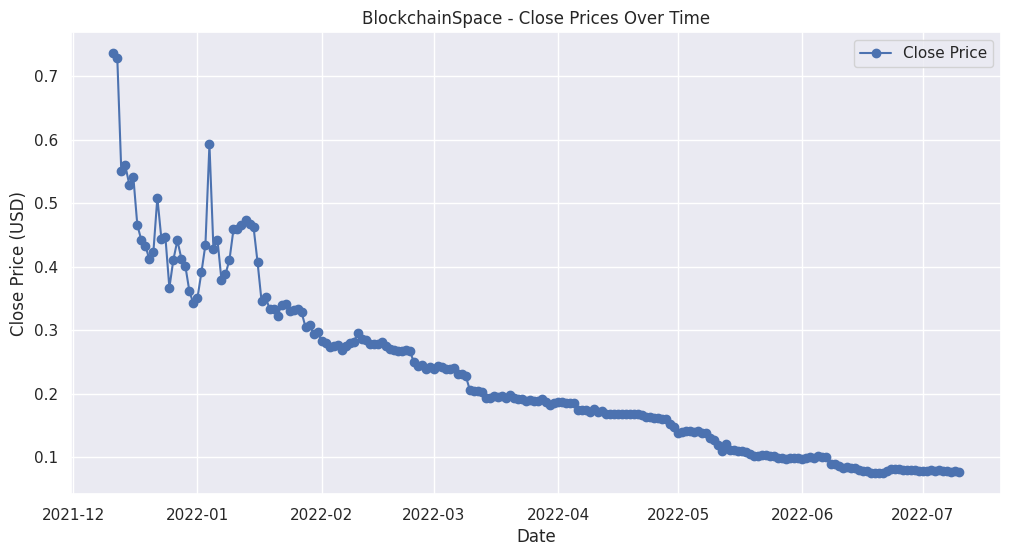

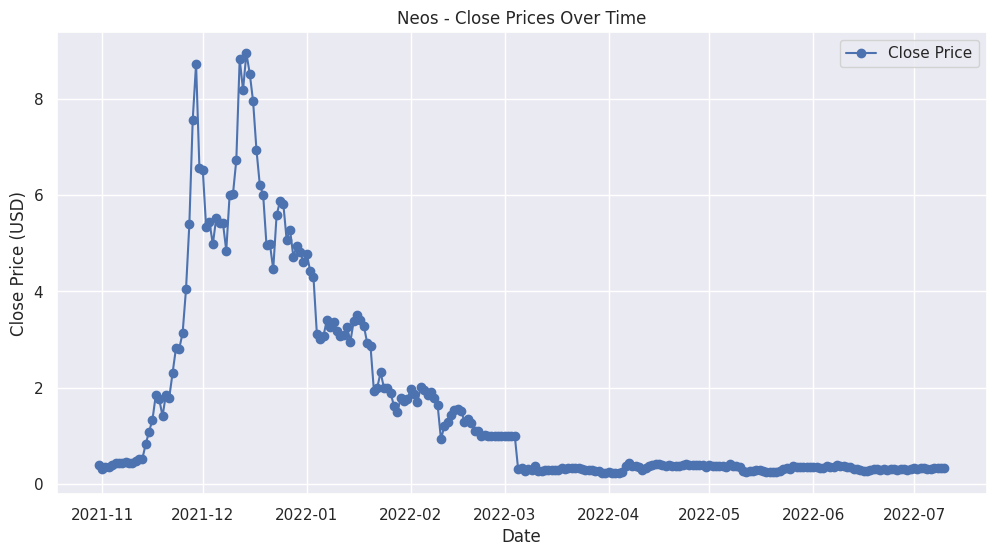

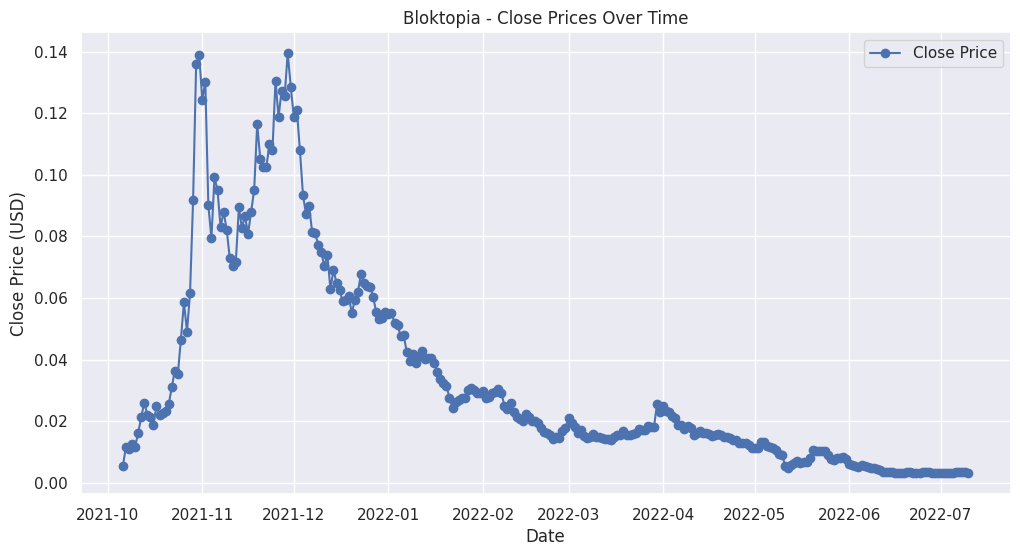

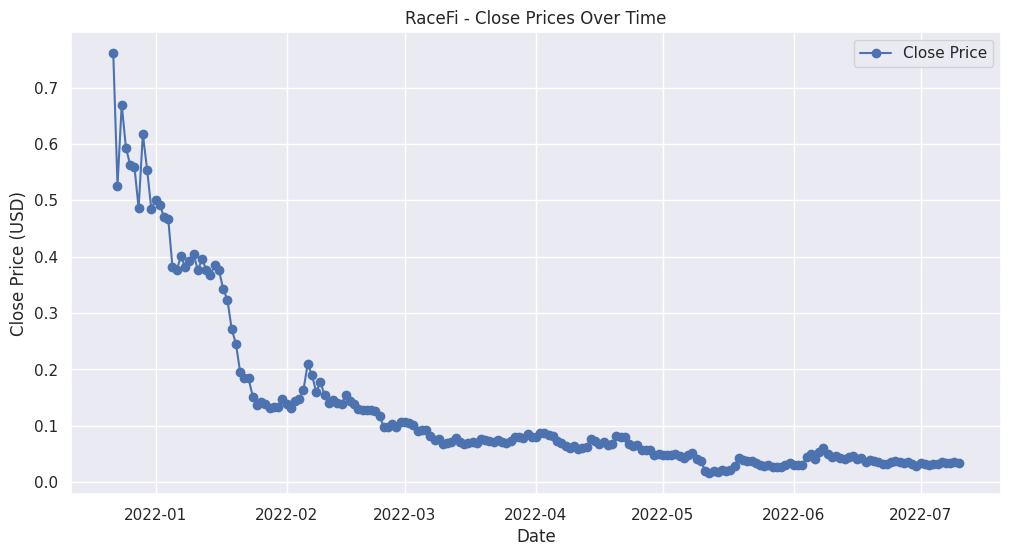

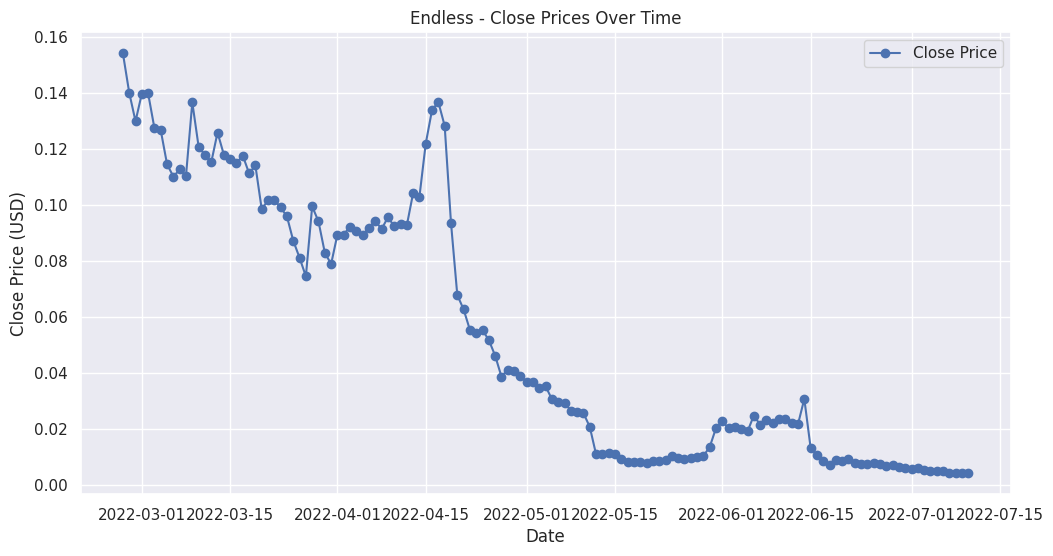

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
coins=['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtEM', 'Somnium', 'MetaSpace', 'Cens', 'Arker',
       'PlayDapp', 'MetaMounts', 'POLYSPORTS', 'Play', 'Bullieverse',
       'Multiverse', 'ETHEKing', 'Defina', 'LuckyMeta', 'Metagalaxy',
       'Shibnobi', 'Strip', 'DNAxCAT', 'AstroGrow', 'SIF', 'MStation',
       'The', 'Affyn', 'MetaVPad', 'Heroes', 'Moon', 'Islandswap',
       'American', 'Laqira', 'Altura', 'FunFi', 'Huny', 'Lovelace', 'ALI',
       'Jenny', 'MetaUFO', 'FlappyDoge', 'StarLink', 'DeepSpace',
       'KlayCity', 'Cats', 'CropBytes', 'Cardiocoin', 'Aavegotchi',
       'Mist', 'Kryxivia', 'Enjin', 'Krypto', 'GameCredits', 'Onston',
       'Kawaii', '9D', 'SpaceFalcon', 'Playermon', 'GridZone.io',
       'MeganSwap', 'Content', 'Lego', 'Decentral', 'MetaWars',
       'LambSwap', 'BODA', 'OneRare', 'ASIX', 'Polytrade', 'Propel',
       'SOMESING', 'Ancient', 'DeHorizon', 'Lepasa', 'AdShares', 'SIDUS',
       'H3RO3S', 'HyperVerse', 'Spheroid', 'MetaMerge', 'MARS4', 'Duckie',
       '7Pixels', 'CyberDragon', 'ClassicDoge', 'Solice', 'DeFi', 'Bean',
       'RaceFi', 'Graviton', 'Puzzle', 'Efinity', 'BoomSpace', 'Rangers',
       'Magic', 'Sinverse', 'Crystal', 'Metagochi', 'Metaverse-Dao',
       'KAKA', 'Shirtum', 'Netvrk', 'GalaxyPad', 'Epik', 'LOCGame', 'OVR',
       'MetaOneVerse', 'SatoshiCity', 'Flokimooni', 'Luffy', 'Hydraverse',
       'SolDate', 'DEEPSPACE', 'PolkaWar', 'Aurory', 'CryptoWar',
       'Binopoly', '1BOX', 'Lelouch', 'Torum', 'MyWorld', 'Bloktopia',
       'RMRK', 'Axie', 'Radio', 'StarSharks', 'Metawear', 'Nano', 'SPACE',
       'MagicBox', 'Metagames', 'Fellaz', 'NELO', 'Karmaverse',
       'FireStarter', 'Astro', 'Star', 'Black', 'HydraMeta', 'Neos',
       'Adroverse', 'KingdomX', 'Doecoin', 'OneArt', 'Fashion', 'ELEF',
       'Planet', 'ARize', 'Age', 'NextEarth', 'Boson', 'Chronicle',
       'Meland.ai', 'FidoMeta', 'MINE', 'Ark', 'FaraLand', 'Endless',
       'Sway', 'Equilibrium', 'Avocado', 'LogiTron', 'Elvantis',
       'Cryptopolis', 'Burn', 'Metapad', 'Crypto', 'Gametree', 'Kalissa',
       'Dragon', 'ENTERBUTTON', 'Moniwar', 'Qfora', 'Sekuya', 'MangaMon',
       'Medacoin', 'Avaxtars', 'Sakura', 'Metabank', 'GameStar', 'Ludena',
       'DoKEN', 'CryptoPlanes', 'Realy', 'PolkaCity', 'CEEK', 'Elemon',
       'Enjinstarter', 'Meli', 'MooMonster', 'SIGNIN', 'TomTom',
       'MetaShib', 'AcknoLedger', 'LaEeb', 'MetaFabric', 'Fistiana',
       'Hellsing', 'Crabada', 'Kalao', 'BITMIC', 'Monsta', 'DragonMaster',
       'KeySwap', 'CryptoCars', 'CronosVerse', 'Legend', 'Chimeras',
       'MetaCos', 'HappyLand', 'SHILL', 'WidiLand', 'Tower', 'Town',
       'Vault', 'Wilder', 'Zone', 'X', 'Victoria', 'Virtual', 'Verasity',
       'Xaya', 'WEMIX', 'VCGamers', 'Velhalla', 'VR', 'Totem',
       'XCarnival', 'Yield', 'Warena', 'UFO', 'Vulcan', 'Wonderman',
       'Wakanda', 'Wizardia', 'bePAY', 'UniX', 'XRUN', 'Vita', 'vEmpire',
       'ZENFI']
selected_coins = random.sample(coins, 5)

# Create and show plots for each selected coin
for coin in selected_coins:
    coin_rows = df[df['coins'] == coin]
    plt.figure(figsize=(12, 6))
    plt.plot(coin_rows['Date'], coin_rows['Close'], label='Close Price', marker='o', linestyle='-')
    plt.title(f'{coin} - Close Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import random

# Assuming df contains your data

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Randomly select up to 10 coins
selected_coins = random.sample(coins, min(5, len(coins)))

# Set up the candlestick chart for each selected coin
for coin in selected_coins:
    coin_rows = df[df['coins'] == coin]

    fig = go.Figure(data=[go.Candlestick(x=coin_rows['Date'],
                                         open=coin_rows['Open'],
                                         high=coin_rows['High'],
                                         low=coin_rows['Low'],
                                         close=coin_rows['Close'])])

    fig.update_layout(title=f'Candlestick Chart for {coin} - Open, High, Low, Close Prices',
                      xaxis_title='Date',
                      yaxis_title='Price (USD)')

    fig.show()


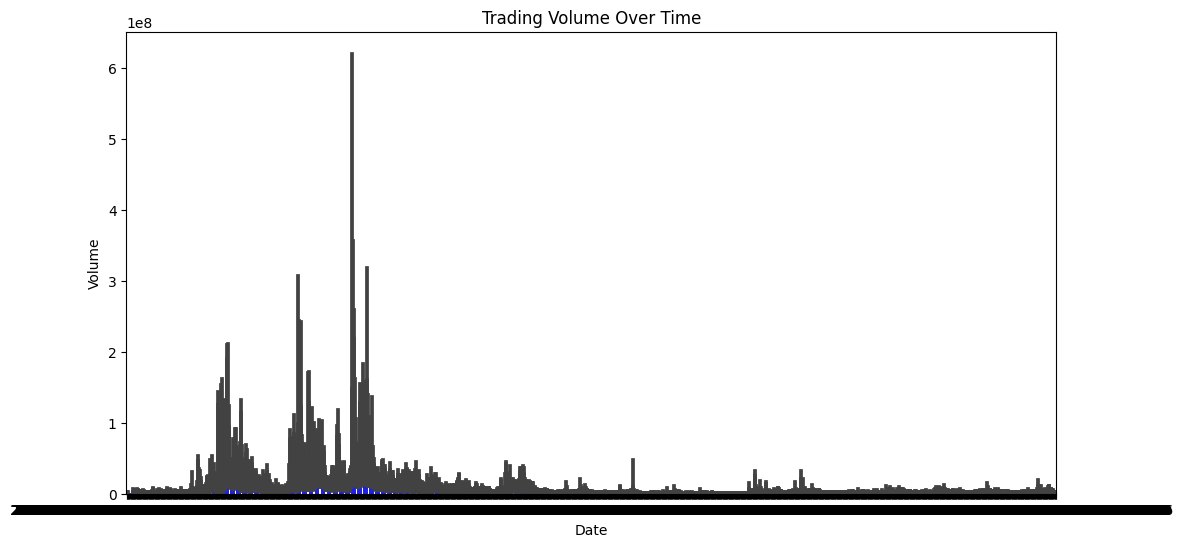

In [ ]:
# Volume bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Date'], y=df['Volume'], color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

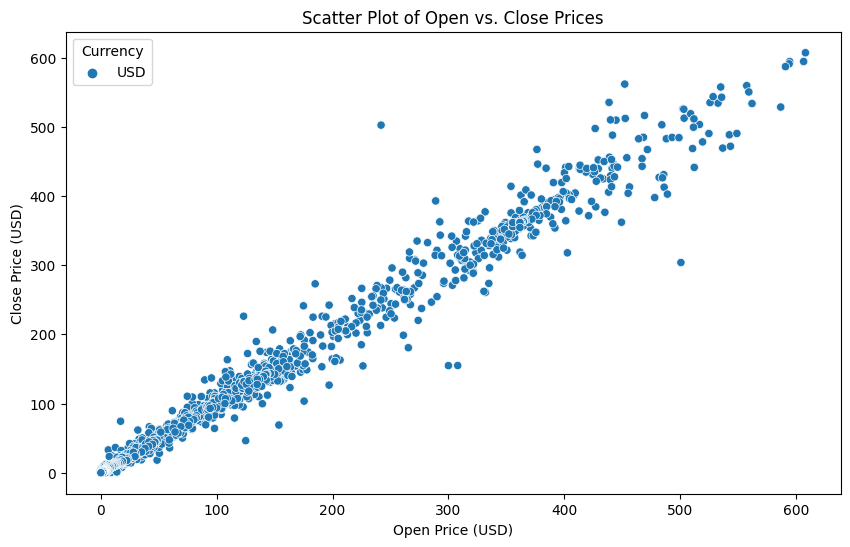

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Open'], y=df['Close'], hue=df['Currency'])
plt.title('Scatter Plot of Open vs. Close Prices')
plt.xlabel('Open Price (USD)')
plt.ylabel('Close Price (USD)')
plt.show()

## Modelling the price movement with LSTM

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Assuming df is your DataFrame
# Create a binary target variable indicating price movement (1 for up, 0 for down)
df['Price_Up'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Extract relevant features and target variable
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df['Price_Up']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM model
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_reshaped, y_test)[1]
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
2490/2490 [==============================] - 13s 5ms/step - loss: 0.6760 - accuracy: 0.5915 - val_loss: 0.6738 - val_accuracy: 0.5954
Epoch 2/10
2490/2490 [==============================] - 10s 4ms/step - loss: 0.6752 - accuracy: 0.5916 - val_loss: 0.6738 - val_accuracy: 0.5958
Epoch 3/10
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6751 - accuracy: 0.5916 - val_loss: 0.6737 - val_accuracy: 0.5959
Epoch 4/10
2490/2490 [==============================] - 9s 4ms/step - loss: 0.6751 - accuracy: 0.5917 - val_loss: 0.6736 - val_accuracy: 0.5959
Epoch 5/10
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6750 - accuracy: 0.5918 - val_loss: 0.6738 - val_accuracy: 0.5958
Epoch 6/10
2490/2490 [==============================] - 10s 4ms/step - loss: 0.6750 - accuracy: 0.5917 - val_loss: 0.6736 - val_accuracy: 0.5959
Epoch 7/10
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6749 - accuracy: 0.5918 - val_loss: 0.6736 - val_accura

## Predicting and modeling the Risk Score using LSTM

<ipython-input-147-63b9067277f1>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-147-63b9067277f1>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/10
2367/2367 [==============================] - 25s 8ms/step - loss: 0.4866 - accuracy: 0.8111 - val_loss: 0.4819 - val_accuracy: 0.8104
Epoch 2/10
2367/2367 [==============================] - 17s 7ms/step - loss: 0.4795 - accuracy: 0.8121 - val_loss: 0.4779 - val_accuracy: 0.8115
Epoch 3/10
2367/2367 [==============================] - 17s 7ms/step - loss: 0.4746 - accuracy: 0.8133 - val_loss: 0.4708 - val_accuracy: 0.8140
Epoch 4/10
2367/2367 [==============================] - 16s 7ms/step - loss: 0.4652 - accuracy: 0.8171 - val_loss: 0.4537 - val_accuracy: 0.8207
Epoch 5/10
2367/2367 [==============================] - 16s 7ms/step - loss: 0.4517 - accuracy: 0.8223 - val_loss: 0.4369 - val_accuracy: 0.8252
Epoch 6/10
2367/2367 [==============================] - 16s 7ms/step - loss: 0.4409 - accuracy: 0.8270 - val_loss: 0.4370 - val_accuracy: 0.8322
Epoch 7/10
2367/2367 [==============================] - 16s 7ms/step - loss: 0.4299 - accuracy: 0.8308 - val_loss: 0.4172 - val_ac

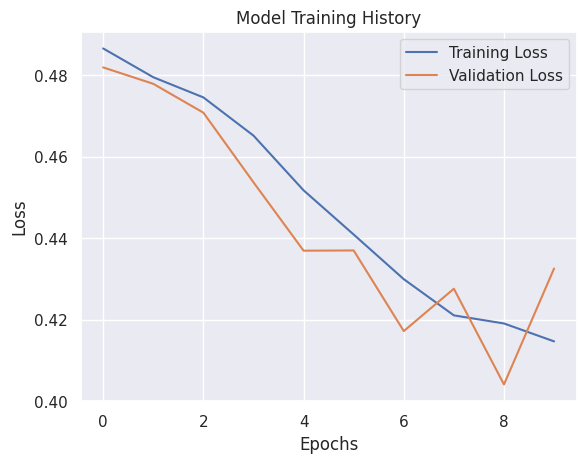

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Generate a synthetic 'ImpermanentLoss' column based on daily price changes
df['ImpermanentLoss'] = df['Close'].pct_change()

# Drop the first row with NaN values
df = df.dropna()

# Create a binary target variable for risk (1 for risk, 0 for no risk)
df['Risk'] = np.where(df['ImpermanentLoss'] > 0.05, 1, 0)  # Adjust threshold as needed

# Select relevant features for modeling
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Normalize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Define features (X) and target variable (y)
X = df[features].values
y = df['Risk'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM model (assuming a time sequence pattern)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so 'sigmoid' activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions on the test set
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Display classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Total Risk Model Visulaization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have predictions from your risk prediction model stored in 'predictions' variable
# In this example, we'll generate synthetic predictions for illustration purposes
np.random.seed(42)
predictions = np.random.rand(len(df))

# Define parameters
risk_threshold = 0.6  # Adjust as needed
moving_average_window = 7  # Adjust as needed

# Generate synthetic 'Risk' column based on the threshold
df['Risk'] = np.where(predictions > risk_threshold, 1, 0)

# Calculate a simple moving average of 'Risk' to smooth the signal
df['Risk_MA'] = df['Risk'].rolling(window=moving_average_window).mean()

# Define liquidity pool management strategies
def add_liquidity_strategy(df, threshold):
    df.loc[df['Risk_MA'] < threshold, 'Action'] = 'Add Liquidity'

def remove_liquidity_strategy(df, threshold):
    df.loc[df['Risk_MA'] >= threshold, 'Action'] = 'Remove Liquidity'

# Apply liquidity pool management strategies
add_liquidity_strategy(df, risk_threshold)
remove_liquidity_strategy(df, risk_threshold)


## Modelling for overall 198 coins looks clumsy, So Randomly 5 coins were selection and RIsk Modelling done

## 1. Price Modeling of Random 5 coins using LSTM

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import random

coins=['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtEM', 'Somnium', 'MetaSpace', 'Cens', 'Arker',
       'PlayDapp', 'MetaMounts', 'POLYSPORTS', 'Play', 'Bullieverse',
       'Multiverse', 'ETHEKing', 'Defina', 'LuckyMeta', 'Metagalaxy',
       'Shibnobi', 'Strip', 'DNAxCAT', 'AstroGrow', 'SIF', 'MStation',
       'The', 'Affyn', 'MetaVPad', 'Heroes', 'Moon', 'Islandswap',
       'American', 'Laqira', 'Altura', 'FunFi', 'Huny', 'Lovelace', 'ALI',
       'Jenny', 'MetaUFO', 'FlappyDoge', 'StarLink', 'DeepSpace',
       'KlayCity', 'Cats', 'CropBytes', 'Cardiocoin', 'Aavegotchi',
       'Mist', 'Kryxivia', 'Enjin', 'Krypto', 'GameCredits', 'Onston',
       'Kawaii', '9D', 'SpaceFalcon', 'Playermon', 'GridZone.io',
       'MeganSwap', 'Content', 'Lego', 'Decentral', 'MetaWars',
       'LambSwap', 'BODA', 'OneRare', 'ASIX', 'Polytrade', 'Propel',
       'SOMESING', 'Ancient', 'DeHorizon', 'Lepasa', 'AdShares', 'SIDUS',
       'H3RO3S', 'HyperVerse', 'Spheroid', 'MetaMerge', 'MARS4', 'Duckie',
       '7Pixels', 'CyberDragon', 'ClassicDoge', 'Solice', 'DeFi', 'Bean',
       'RaceFi', 'Graviton', 'Puzzle', 'Efinity', 'BoomSpace', 'Rangers',
       'Magic', 'Sinverse', 'Crystal', 'Metagochi', 'Metaverse-Dao',
       'KAKA', 'Shirtum', 'Netvrk', 'GalaxyPad', 'Epik', 'LOCGame', 'OVR',
       'MetaOneVerse', 'SatoshiCity', 'Flokimooni', 'Luffy', 'Hydraverse',
       'SolDate', 'DEEPSPACE', 'PolkaWar', 'Aurory', 'CryptoWar',
       'Binopoly', '1BOX', 'Lelouch', 'Torum', 'MyWorld', 'Bloktopia',
       'RMRK', 'Axie', 'Radio', 'StarSharks', 'Metawear', 'Nano', 'SPACE',
       'MagicBox', 'Metagames', 'Fellaz', 'NELO', 'Karmaverse',
       'FireStarter', 'Astro', 'Star', 'Black', 'HydraMeta', 'Neos',
       'Adroverse', 'KingdomX', 'Doecoin', 'OneArt', 'Fashion', 'ELEF',
       'Planet', 'ARize', 'Age', 'NextEarth', 'Boson', 'Chronicle',
       'Meland.ai', 'FidoMeta', 'MINE', 'Ark', 'FaraLand', 'Endless',
       'Sway', 'Equilibrium', 'Avocado', 'LogiTron', 'Elvantis',
       'Cryptopolis', 'Burn', 'Metapad', 'Crypto', 'Gametree', 'Kalissa',
       'Dragon', 'ENTERBUTTON', 'Moniwar', 'Qfora', 'Sekuya', 'MangaMon',
       'Medacoin', 'Avaxtars', 'Sakura', 'Metabank', 'GameStar', 'Ludena',
       'DoKEN', 'CryptoPlanes', 'Realy', 'PolkaCity', 'CEEK', 'Elemon',
       'Enjinstarter', 'Meli', 'MooMonster', 'SIGNIN', 'TomTom',
       'MetaShib', 'AcknoLedger', 'LaEeb', 'MetaFabric', 'Fistiana',
       'Hellsing', 'Crabada', 'Kalao', 'BITMIC', 'Monsta', 'DragonMaster',
       'KeySwap', 'CryptoCars', 'CronosVerse', 'Legend', 'Chimeras',
       'MetaCos', 'HappyLand', 'SHILL', 'WidiLand', 'Tower', 'Town',
       'Vault', 'Wilder', 'Zone', 'X', 'Victoria', 'Virtual', 'Verasity',
       'Xaya', 'WEMIX', 'VCGamers', 'Velhalla', 'VR', 'Totem',
       'XCarnival', 'Yield', 'Warena', 'UFO', 'Vulcan', 'Wonderman',
       'Wakanda', 'Wizardia', 'bePAY', 'UniX', 'XRUN', 'Vita', 'vEmpire',
       'ZENFI']
# Randomly select five coins
selected_coins = random.sample(coins, 5)

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Coin', 'Test Accuracy'])

# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin].copy()

    # Create a binary target variable indicating price movement (1 for up, 0 for down)
    coin_rows['Price_Up'] = np.where(coin_rows['Close'].shift(-1) > coin_rows['Close'], 1, 0)

    # Extract relevant features and target variable
    features = coin_rows[['Open', 'High', 'Low', 'Close', 'Volume']]
    target = coin_rows['Price_Up']

    # Check if there are enough samples for training
    if len(target) < 2:
        print(f"Skipping {coin} due to insufficient data for training.")
        continue

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the data for LSTM model
    X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)[1]

    # Append results to the DataFrame
    results_df = results_df.append({'Coin': coin, 'Test Accuracy': accuracy}, ignore_index=True)

# Display results
print(results_df)

<ipython-input-49-6bb542424fc7>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Coin': coin, 'Test Accuracy': accuracy}, ignore_index=True)
<ipython-input-49-6bb542424fc7>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Coin': coin, 'Test Accuracy': accuracy}, ignore_index=True)
<ipython-input-49-6bb542424fc7>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Coin': coin, 'Test Accuracy': accuracy}, ignore_index=True)
<ipython-input-49-6bb542424fc7>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'

        Coin  Test Accuracy
0        Got       1.000000
1     Vulcan       0.444444
2  PolkaCity       0.495050
3     Fellaz       0.666667
4     ShoeFy       0.740741


<ipython-input-49-6bb542424fc7>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Coin': coin, 'Test Accuracy': accuracy}, ignore_index=True)


## Modelling and Risk Score prediction of Random 5 coins

<ipython-input-85-4fbd91c1cdb3>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-4fbd91c1cdb3>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-4fbd91c1cdb3>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Skipping Shirtum due to insufficient samples for both classes.
Skipping Rici due to insufficient samples for both classes.
Epoch 1/10
1/1 [==============================] - 9s 9s/step - loss: 0.6933 - accuracy: 0.5455 - val_loss: 0.6935 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 0.6920 - accuracy: 0.8182 - val_loss: 0.6938 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.6908 - accuracy: 0.8182 - val_loss: 0.6942 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 56ms/step - loss: 0.6896 - accuracy: 0.8182 - val_loss: 0.6946 - val_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 0.6883 - accuracy: 0.8182 - val_loss: 0.6951 - val_accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 41ms/step - loss: 0.6870 - accuracy: 0.8182 - val_loss: 0.6955 - val_accuracy: 0.3333
Epoch 7/10
1/1 [=============================

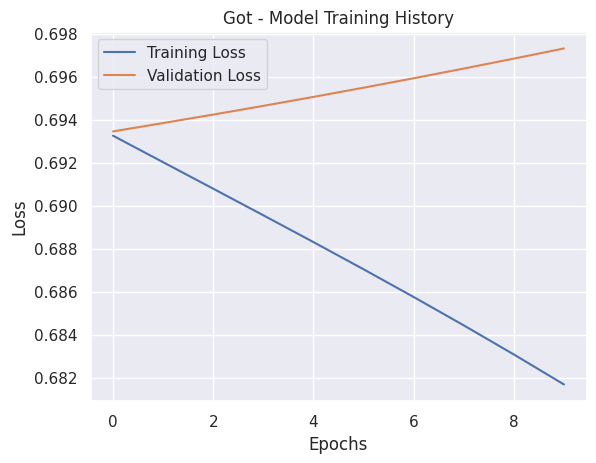

<ipython-input-85-4fbd91c1cdb3>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-4fbd91c1cdb3>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Skipping CronosVerse due to insufficient samples for both classes.
Epoch 1/10
7/7 [==============================] - 9s 299ms/step - loss: 0.6883 - accuracy: 0.9208 - val_loss: 0.6803 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6745 - accuracy: 0.9950 - val_loss: 0.6650 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6575 - accuracy: 0.9950 - val_loss: 0.6451 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6347 - accuracy: 0.9950 - val_loss: 0.6177 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6027 - accuracy: 0.9950 - val_loss: 0.5782 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5554 - accuracy: 0.9950 - val_loss: 0.5197 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.4878 - accuracy: 0.9950 -

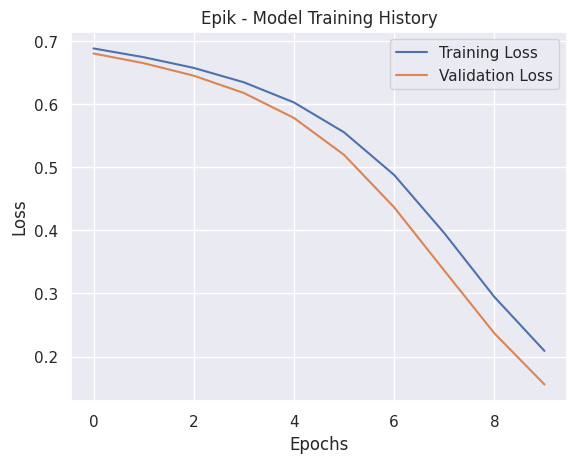

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import random

coins=['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtEM', 'Somnium', 'MetaSpace', 'Cens', 'Arker',
       'PlayDapp', 'MetaMounts', 'POLYSPORTS', 'Play', 'Bullieverse',
       'Multiverse', 'ETHEKing', 'Defina', 'LuckyMeta', 'Metagalaxy',
       'Shibnobi', 'Strip', 'DNAxCAT', 'AstroGrow', 'SIF', 'MStation',
       'The', 'Affyn', 'MetaVPad', 'Heroes', 'Moon', 'Islandswap',
       'American', 'Laqira', 'Altura', 'FunFi', 'Huny', 'Lovelace', 'ALI',
       'Jenny', 'MetaUFO', 'FlappyDoge', 'StarLink', 'DeepSpace',
       'KlayCity', 'Cats', 'CropBytes', 'Cardiocoin', 'Aavegotchi',
       'Mist', 'Kryxivia', 'Enjin', 'Krypto', 'GameCredits', 'Onston',
       'Kawaii', '9D', 'SpaceFalcon', 'Playermon', 'GridZone.io',
       'MeganSwap', 'Content', 'Lego', 'Decentral', 'MetaWars',
       'LambSwap', 'BODA', 'OneRare', 'ASIX', 'Polytrade', 'Propel',
       'SOMESING', 'Ancient', 'DeHorizon', 'Lepasa', 'AdShares', 'SIDUS',
       'H3RO3S', 'HyperVerse', 'Spheroid', 'MetaMerge', 'MARS4', 'Duckie',
       '7Pixels', 'CyberDragon', 'ClassicDoge', 'Solice', 'DeFi', 'Bean',
       'RaceFi', 'Graviton', 'Puzzle', 'Efinity', 'BoomSpace', 'Rangers',
       'Magic', 'Sinverse', 'Crystal', 'Metagochi', 'Metaverse-Dao',
       'KAKA', 'Shirtum', 'Netvrk', 'GalaxyPad', 'Epik', 'LOCGame', 'OVR',
       'MetaOneVerse', 'SatoshiCity', 'Flokimooni', 'Luffy', 'Hydraverse',
       'SolDate', 'DEEPSPACE', 'PolkaWar', 'Aurory', 'CryptoWar',
       'Binopoly', '1BOX', 'Lelouch', 'Torum', 'MyWorld', 'Bloktopia',
       'RMRK', 'Axie', 'Radio', 'StarSharks', 'Metawear', 'Nano', 'SPACE',
       'MagicBox', 'Metagames', 'Fellaz', 'NELO', 'Karmaverse',
       'FireStarter', 'Astro', 'Star', 'Black', 'HydraMeta', 'Neos',
       'Adroverse', 'KingdomX', 'Doecoin', 'OneArt', 'Fashion', 'ELEF',
       'Planet', 'ARize', 'Age', 'NextEarth', 'Boson', 'Chronicle',
       'Meland.ai', 'FidoMeta', 'MINE', 'Ark', 'FaraLand', 'Endless',
       'Sway', 'Equilibrium', 'Avocado', 'LogiTron', 'Elvantis',
       'Cryptopolis', 'Burn', 'Metapad', 'Crypto', 'Gametree', 'Kalissa',
       'Dragon', 'ENTERBUTTON', 'Moniwar', 'Qfora', 'Sekuya', 'MangaMon',
       'Medacoin', 'Avaxtars', 'Sakura', 'Metabank', 'GameStar', 'Ludena',
       'DoKEN', 'CryptoPlanes', 'Realy', 'PolkaCity', 'CEEK', 'Elemon',
       'Enjinstarter', 'Meli', 'MooMonster', 'SIGNIN', 'TomTom',
       'MetaShib', 'AcknoLedger', 'LaEeb', 'MetaFabric', 'Fistiana',
       'Hellsing', 'Crabada', 'Kalao', 'BITMIC', 'Monsta', 'DragonMaster',
       'KeySwap', 'CryptoCars', 'CronosVerse', 'Legend', 'Chimeras',
       'MetaCos', 'HappyLand', 'SHILL', 'WidiLand', 'Tower', 'Town',
       'Vault', 'Wilder', 'Zone', 'X', 'Victoria', 'Virtual', 'Verasity',
       'Xaya', 'WEMIX', 'VCGamers', 'Velhalla', 'VR', 'Totem',
       'XCarnival', 'Yield', 'Warena', 'UFO', 'Vulcan', 'Wonderman',
       'Wakanda', 'Wizardia', 'bePAY', 'UniX', 'XRUN', 'Vita', 'vEmpire',
       'ZENFI']

# Randomly select five coins
selected_coins = random.sample(coins, 5)

# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Check if there are enough samples for the train-test split
    if len(coin_rows) < 2:
        print(f'Skipping {coin} due to insufficient samples.')
        continue

    # Generate a synthetic 'ImpermanentLoss' column based on daily price changes
    coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()

    # Drop the first row with NaN values
    coin_rows = coin_rows.dropna()

    # Create a binary target variable for risk (1 for risk, 0 for no risk)
    coin_rows['Risk'] = np.where(coin_rows['ImpermanentLoss'] > 0.05, 1, 0)  # Adjust threshold as needed

    # Select relevant features for modeling
    features = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Normalize features
    scaler = StandardScaler()
    coin_rows[features] = scaler.fit_transform(coin_rows[features])

    # Define features (X) and target variable (y)
    X = coin_rows[features].values
    y = coin_rows['Risk'].values

    # Check if there are enough samples for the train-test split
    if len(set(y)) < 2:
        print(f'Skipping {coin} due to insufficient samples for both classes.')
        continue

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape data for LSTM model (assuming a time sequence pattern)
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so 'sigmoid' activation

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'{coin} - Test Accuracy: {accuracy * 100:.2f}%')

    # Make predictions on the test set
    predictions = (model.predict(X_test) > 0.5).astype("int32")

    # Display classification report and confusion matrix
    print(f'{coin} - Classification Report:')
    print(classification_report(y_test, predictions))
    print(f'{coin} - Confusion Matrix:')
    print(confusion_matrix(y_test, predictions))

    # Visualize training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{coin} - Model Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


## Risk and Liquidity Pool management Strategies of Random 5 coins

<ipython-input-88-e51690190223>:81: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-e51690190223>:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



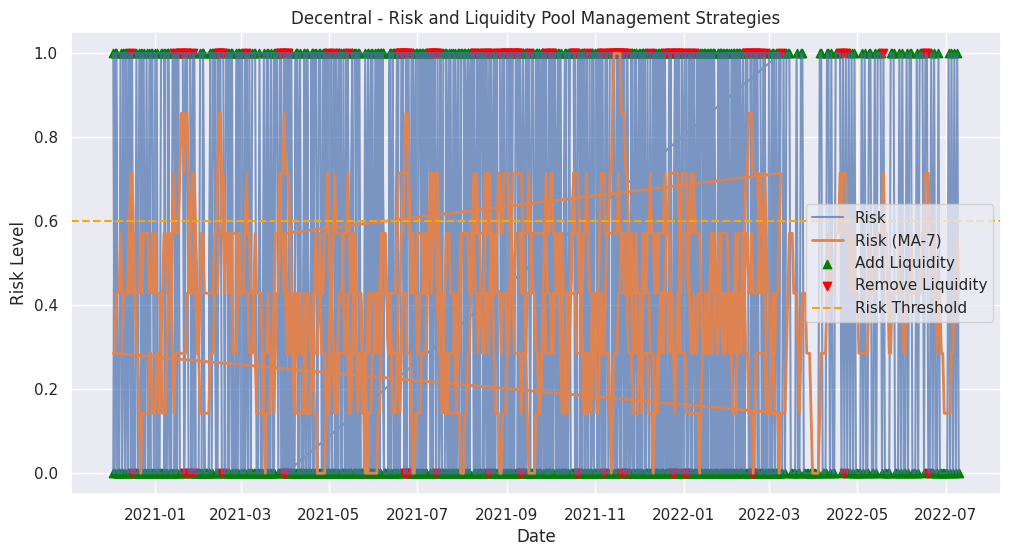

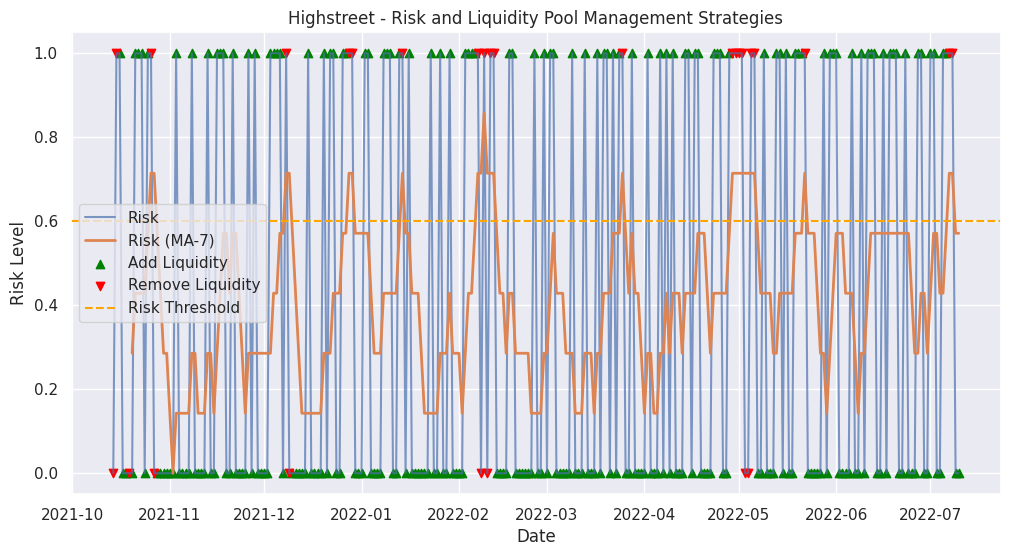

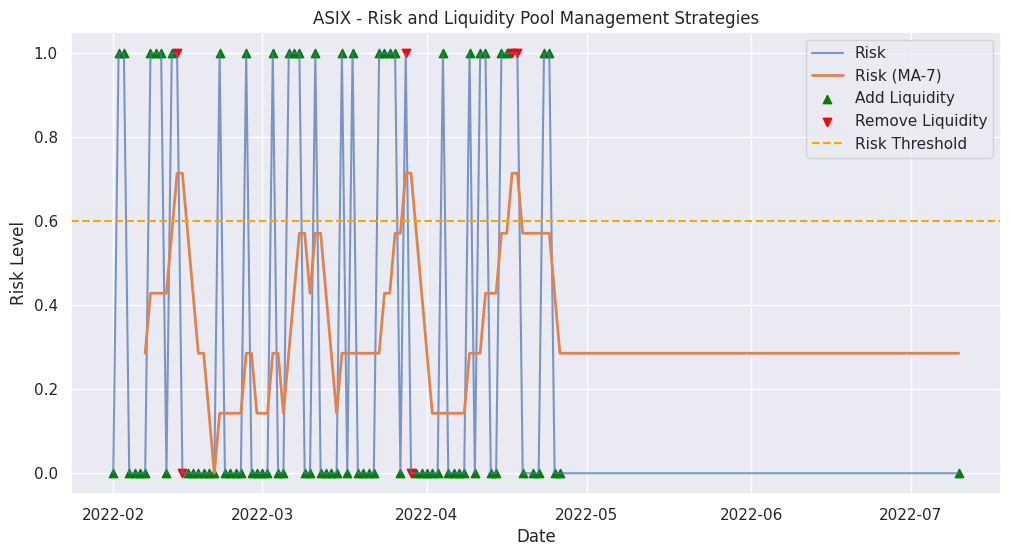

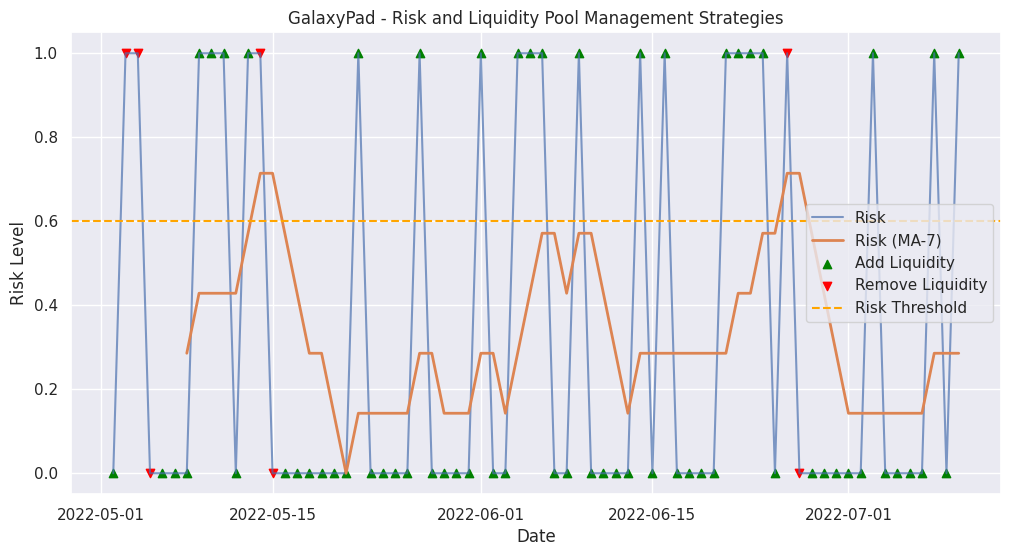

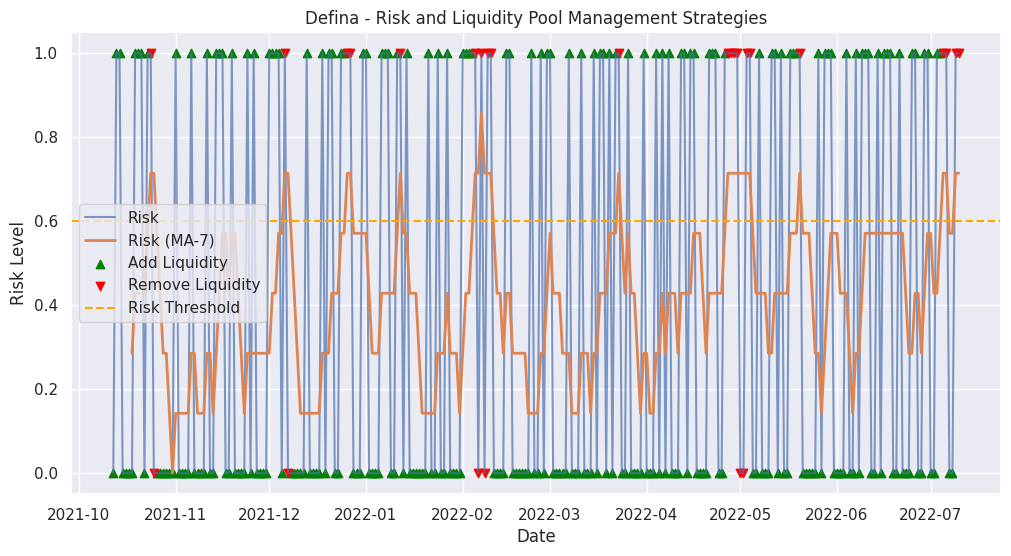

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

coins=['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtEM', 'Somnium', 'MetaSpace', 'Cens', 'Arker',
       'PlayDapp', 'MetaMounts', 'POLYSPORTS', 'Play', 'Bullieverse',
       'Multiverse', 'ETHEKing', 'Defina', 'LuckyMeta', 'Metagalaxy',
       'Shibnobi', 'Strip', 'DNAxCAT', 'AstroGrow', 'SIF', 'MStation',
       'The', 'Affyn', 'MetaVPad', 'Heroes', 'Moon', 'Islandswap',
       'American', 'Laqira', 'Altura', 'FunFi', 'Huny', 'Lovelace', 'ALI',
       'Jenny', 'MetaUFO', 'FlappyDoge', 'StarLink', 'DeepSpace',
       'KlayCity', 'Cats', 'CropBytes', 'Cardiocoin', 'Aavegotchi',
       'Mist', 'Kryxivia', 'Enjin', 'Krypto', 'GameCredits', 'Onston',
       'Kawaii', '9D', 'SpaceFalcon', 'Playermon', 'GridZone.io',
       'MeganSwap', 'Content', 'Lego', 'Decentral', 'MetaWars',
       'LambSwap', 'BODA', 'OneRare', 'ASIX', 'Polytrade', 'Propel',
       'SOMESING', 'Ancient', 'DeHorizon', 'Lepasa', 'AdShares', 'SIDUS',
       'H3RO3S', 'HyperVerse', 'Spheroid', 'MetaMerge', 'MARS4', 'Duckie',
       '7Pixels', 'CyberDragon', 'ClassicDoge', 'Solice', 'DeFi', 'Bean',
       'RaceFi', 'Graviton', 'Puzzle', 'Efinity', 'BoomSpace', 'Rangers',
       'Magic', 'Sinverse', 'Crystal', 'Metagochi', 'Metaverse-Dao',
       'KAKA', 'Shirtum', 'Netvrk', 'GalaxyPad', 'Epik', 'LOCGame', 'OVR',
       'MetaOneVerse', 'SatoshiCity', 'Flokimooni', 'Luffy', 'Hydraverse',
       'SolDate', 'DEEPSPACE', 'PolkaWar', 'Aurory', 'CryptoWar',
       'Binopoly', '1BOX', 'Lelouch', 'Torum', 'MyWorld', 'Bloktopia',
       'RMRK', 'Axie', 'Radio', 'StarSharks', 'Metawear', 'Nano', 'SPACE',
       'MagicBox', 'Metagames', 'Fellaz', 'NELO', 'Karmaverse',
       'FireStarter', 'Astro', 'Star', 'Black', 'HydraMeta', 'Neos',
       'Adroverse', 'KingdomX', 'Doecoin', 'OneArt', 'Fashion', 'ELEF',
       'Planet', 'ARize', 'Age', 'NextEarth', 'Boson', 'Chronicle',
       'Meland.ai', 'FidoMeta', 'MINE', 'Ark', 'FaraLand', 'Endless',
       'Sway', 'Equilibrium', 'Avocado', 'LogiTron', 'Elvantis',
       'Cryptopolis', 'Burn', 'Metapad', 'Crypto', 'Gametree', 'Kalissa',
       'Dragon', 'ENTERBUTTON', 'Moniwar', 'Qfora', 'Sekuya', 'MangaMon',
       'Medacoin', 'Avaxtars', 'Sakura', 'Metabank', 'GameStar', 'Ludena',
       'DoKEN', 'CryptoPlanes', 'Realy', 'PolkaCity', 'CEEK', 'Elemon',
       'Enjinstarter', 'Meli', 'MooMonster', 'SIGNIN', 'TomTom',
       'MetaShib', 'AcknoLedger', 'LaEeb', 'MetaFabric', 'Fistiana',
       'Hellsing', 'Crabada', 'Kalao', 'BITMIC', 'Monsta', 'DragonMaster',
       'KeySwap', 'CryptoCars', 'CronosVerse', 'Legend', 'Chimeras',
       'MetaCos', 'HappyLand', 'SHILL', 'WidiLand', 'Tower', 'Town',
       'Vault', 'Wilder', 'Zone', 'X', 'Victoria', 'Virtual', 'Verasity',
       'Xaya', 'WEMIX', 'VCGamers', 'Velhalla', 'VR', 'Totem',
       'XCarnival', 'Yield', 'Warena', 'UFO', 'Vulcan', 'Wonderman',
       'Wakanda', 'Wizardia', 'bePAY', 'UniX', 'XRUN', 'Vita', 'vEmpire',
       'ZENFI']

# Randomly select five coins
selected_coins = random.sample(coins, 5)

# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Define parameters
    risk_threshold = 0.6  # Adjust as needed
    moving_average_window = 7  # Adjust as needed

    # Assuming you have predictions from your risk prediction model stored in 'predictions' variable
    # In this example, we'll generate synthetic predictions for illustration purposes
    np.random.seed(42)
    predictions = np.random.rand(len(coin_rows))

    # Generate synthetic 'Risk' column based on the threshold
    coin_rows['Risk'] = np.where(predictions > risk_threshold, 1, 0)

    # Calculate a simple moving average of 'Risk' to smooth the signal
    coin_rows['Risk_MA'] = coin_rows['Risk'].rolling(window=moving_average_window).mean()

    # Define liquidity pool management strategies
    def add_liquidity_strategy(df, threshold):
        df.loc[df['Risk_MA'] < threshold, 'Action'] = 'Add Liquidity'

    def remove_liquidity_strategy(df, threshold):
        df.loc[df['Risk_MA'] >= threshold, 'Action'] = 'Remove Liquidity'

    # Apply liquidity pool management strategies
    add_liquidity_strategy(coin_rows, risk_threshold)
    remove_liquidity_strategy(coin_rows, risk_threshold)

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(coin_rows['Risk'], label='Risk', alpha=0.7)
    plt.plot(coin_rows['Risk_MA'], label=f'Risk (MA-{moving_average_window})', linewidth=2)
    plt.scatter(coin_rows[coin_rows['Action'] == 'Add Liquidity'].index, coin_rows[coin_rows['Action'] == 'Add Liquidity']['Risk'], color='green', label='Add Liquidity', marker='^')
    plt.scatter(coin_rows[coin_rows['Action'] == 'Remove Liquidity'].index, coin_rows[coin_rows['Action'] == 'Remove Liquidity']['Risk'], color='red', label='Remove Liquidity', marker='v')
    plt.axhline(y=risk_threshold, color='orange', linestyle='--', label='Risk Threshold')
    plt.title(f'{coin} - Risk and Liquidity Pool Management Strategies')
    plt.xlabel('Date')
    plt.ylabel('Risk Level')
    plt.legend()
    plt.show()



## Risk Modeling and Liquidity Pool management is not accurate with Risk Classification. So,Risk Score is predicted with LSTM 

<ipython-input-50-f94b3257cdba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 3.4849 - val_loss: 0.8441
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 3.4813 - val_loss: 0.8480
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: 3.4777 - val_loss: 0.8519
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 3.4741 - val_loss: 0.8557
Epoch 5/10
1/1 [==============================] - 0s 32ms/step - loss: 3.4704 - val_loss: 0.8596
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 3.4667 - val_loss: 0.8635
Epoch 7/10
1/1 [==============================] - 0s 32ms/step - loss: 3.4628 - val_loss: 0.8674
Epoch 8/10
1/1 [==============================] - 0s 41ms/step - loss: 3.4588 - val_loss: 0.8713
Epoch 9/10
1/1 [==============================] - 0s 34ms/step - loss: 3.4545 - val_loss: 0.8752
Epoch 10/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6120
Got - Test Loss: 0.6120460033416748


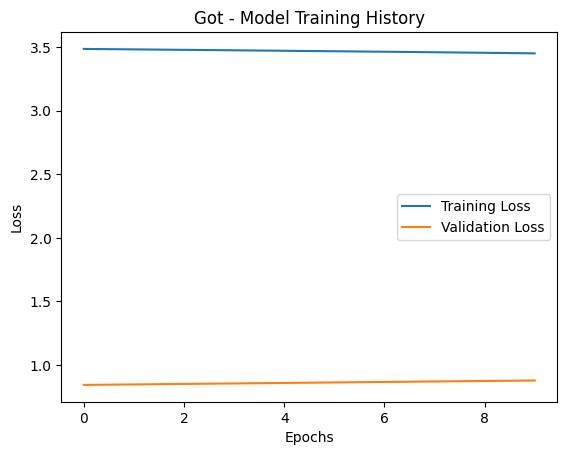

1/1 [==============================] - 1s 866ms/step
Got - Mean Squared Error (MSE): 0.6124842947179253
Got - Root Mean Squared Error (RMSE): 0.7826137583239419
Got - Mean Absolute Error (MAE): 0.6990472172865472


<ipython-input-50-f94b3257cdba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()


Epoch 1/10
9/9 [==============================] - 5s 136ms/step - loss: 4.7107 - val_loss: 8.0351
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 4.7081 - val_loss: 8.0258
Epoch 3/10
9/9 [==============================] - 0s 13ms/step - loss: 4.7060 - val_loss: 8.0171
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 4.7026 - val_loss: 8.0138
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 4.6994 - val_loss: 8.0080
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 4.6970 - val_loss: 7.9914
Epoch 7/10
9/9 [==============================] - 0s 13ms/step - loss: 4.6883 - val_loss: 7.9765
Epoch 8/10
9/9 [==============================] - 0s 15ms/step - loss: 4.6769 - val_loss: 7.9629
Epoch 9/10
9/9 [==============================] - 0s 14ms/step - loss: 4.6586 - val_loss: 7.9440
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 3.6635
Vulcan - Test Loss: 3.663534164428711


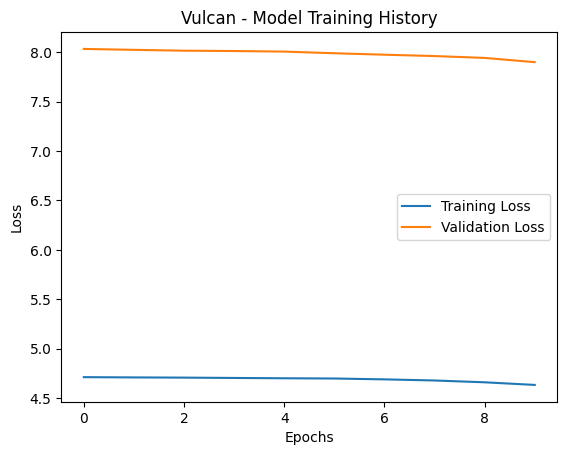

3/3 [==============================] - 1s 5ms/step
Vulcan - Mean Squared Error (MSE): 3.7438960051897197
Vulcan - Root Mean Squared Error (RMSE): 1.9349149865536004
Vulcan - Mean Absolute Error (MAE): 1.4603291782621732


<ipython-input-50-f94b3257cdba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()


Epoch 1/10
10/10 [==============================] - 5s 122ms/step - loss: 10.4758 - val_loss: 5.4224
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 10.4678 - val_loss: 5.4206
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 10.4624 - val_loss: 5.4177
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 10.4556 - val_loss: 5.4133
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 10.4435 - val_loss: 5.4060
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 10.4348 - val_loss: 5.3927
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 10.3939 - val_loss: 5.3715
Epoch 8/10
10/10 [==============================] - 0s 9ms/step - loss: 10.3366 - val_loss: 5.3335
Epoch 9/10
10/10 [==============================] - 0s 8ms/step - loss: 10.2344 - val_loss: 5.2700
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 10.5578
PolkaCity - Test Loss: 10.

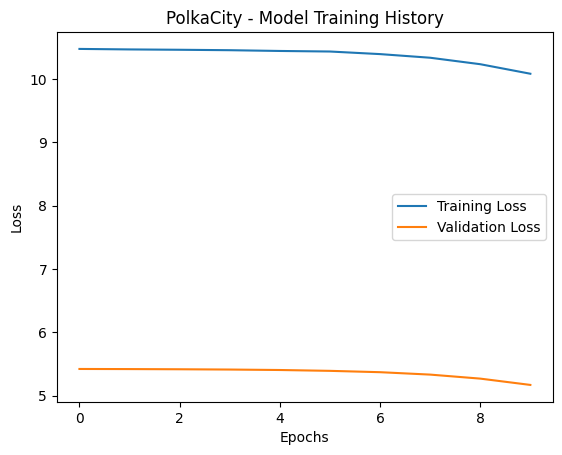

4/4 [==============================] - 1s 5ms/step
PolkaCity - Mean Squared Error (MSE): 11.006758182231648
PolkaCity - Root Mean Squared Error (RMSE): 3.3176434682213287
PolkaCity - Mean Absolute Error (MAE): 2.0445491858747786


<ipython-input-50-f94b3257cdba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 16.9722 - val_loss: 0.5852
Epoch 2/10
1/1 [==============================] - 0s 35ms/step - loss: 16.9505 - val_loss: 0.5891
Epoch 3/10
1/1 [==============================] - 0s 34ms/step - loss: 16.9288 - val_loss: 0.5930
Epoch 4/10
1/1 [==============================] - 0s 36ms/step - loss: 16.9072 - val_loss: 0.5970
Epoch 5/10
1/1 [==============================] - 0s 32ms/step - loss: 16.8853 - val_loss: 0.6011
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 16.8629 - val_loss: 0.6054
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 16.8398 - val_loss: 0.6098
Epoch 8/10
1/1 [==============================] - 0s 33ms/step - loss: 16.8160 - val_loss: 0.6144
Epoch 9/10
1/1 [==============================] - 0s 33ms/step - loss: 16.7911 - val_loss: 0.6192
Epoch 10/10
1/1 [==============================] - 0s 21ms/step - loss: 8.8361
Fellaz - Test Loss: 8.836060523986816


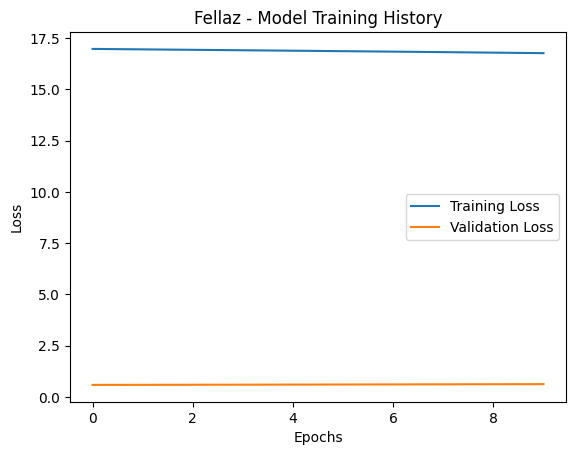

1/1 [==============================] - 1s 873ms/step
Fellaz - Mean Squared Error (MSE): 8.803336557232699
Fellaz - Root Mean Squared Error (RMSE): 2.9670417181483475
Fellaz - Mean Absolute Error (MAE): 2.266999418019555


<ipython-input-50-f94b3257cdba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()


Epoch 1/10
6/6 [==============================] - 6s 277ms/step - loss: 1755.4342 - val_loss: 26.5317
Epoch 2/10
6/6 [==============================] - 0s 11ms/step - loss: 1755.2733 - val_loss: 26.5197
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 1755.1781 - val_loss: 26.5051
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 1754.9941 - val_loss: 26.4899
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 1754.7805 - val_loss: 26.4730
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 1754.5381 - val_loss: 26.4514
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 1754.1605 - val_loss: 26.4257
Epoch 8/10
6/6 [==============================] - 0s 13ms/step - loss: 1753.6378 - val_loss: 26.3947
Epoch 9/10
6/6 [==============================] - 0s 11ms/step - loss: 1753.0780 - val_loss: 26.3480
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 3.8966
ShoeFy - Tes

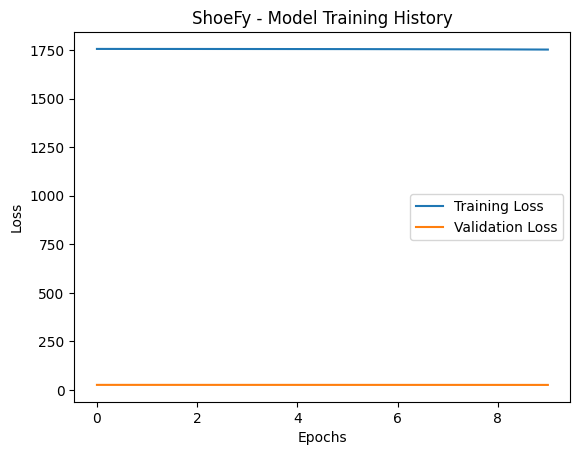

2/2 [==============================] - 1s 8ms/step
ShoeFy - Mean Squared Error (MSE): 3.8961498086074666
ShoeFy - Root Mean Squared Error (RMSE): 1.9738667150057185
ShoeFy - Mean Absolute Error (MAE): 1.3659016782717346


In [50]:
# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Check if there are enough samples for the train-test split
    if len(coin_rows) < 2:
        print(f'Skipping {coin} due to insufficient samples.')
        continue

    # Generate a synthetic 'ImpermanentLoss' column based on daily price changes
    coin_rows['ImpermanentLoss'] = coin_rows['Close'].pct_change()

    # Drop the first row with NaN values
    coin_rows = coin_rows.dropna()

    # Calculate Risk Score instead of binary classification
    coin_rows['RiskScore'] = coin_rows['ImpermanentLoss'] / 0.05  # Example scaling by a factor of 0.05

    # Normalize features
    scaler = StandardScaler()
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    coin_rows[features] = scaler.fit_transform(coin_rows[features])

    # Define features (X) and target variable (y)
    X = coin_rows[features].values
    y = coin_rows['RiskScore'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape data for LSTM model (assuming a time sequence pattern)
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    loss = model.evaluate(X_test, y_test)
    print(f'{coin} - Test Loss: {loss}')

    # Visualize training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{coin} - Model Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print evaluation metrics
    mse = np.mean(np.square(y_test - y_pred))
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))

    print(f'{coin} - Mean Squared Error (MSE): {mse}')
    print(f'{coin} - Root Mean Squared Error (RMSE): {rmse}')
    print(f'{coin} - Mean Absolute Error (MAE): {mae}')

## Risk Modelling with Risk Score 

<ipython-input-52-02adb1e259c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['Date'] = pd.to_datetime(coin_rows['Date'])
<ipython-input-52-02adb1e259c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['RiskScore'] = risk_scores
<ipython-input-52-02adb1e259c4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

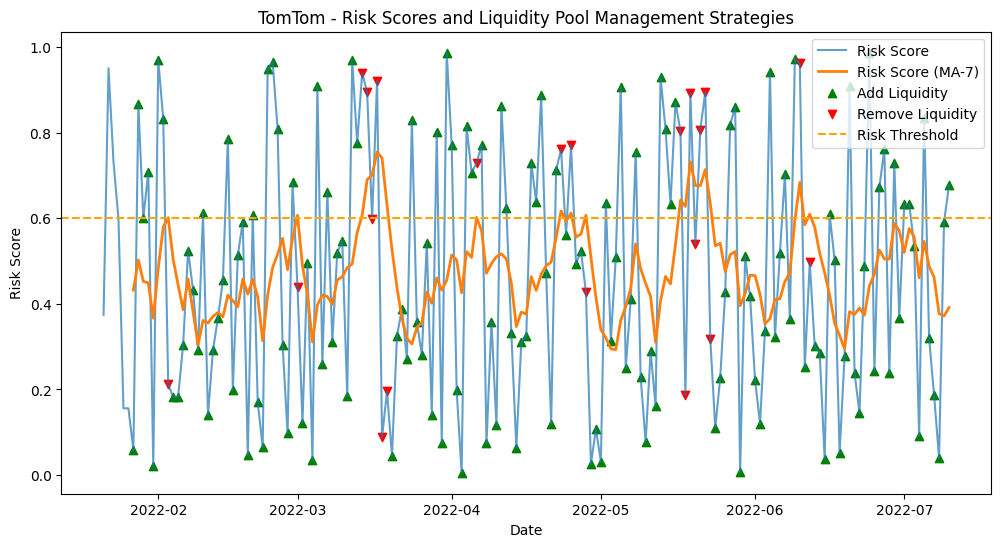

<ipython-input-52-02adb1e259c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['Date'] = pd.to_datetime(coin_rows['Date'])
<ipython-input-52-02adb1e259c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['RiskScore'] = risk_scores
<ipython-input-52-02adb1e259c4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

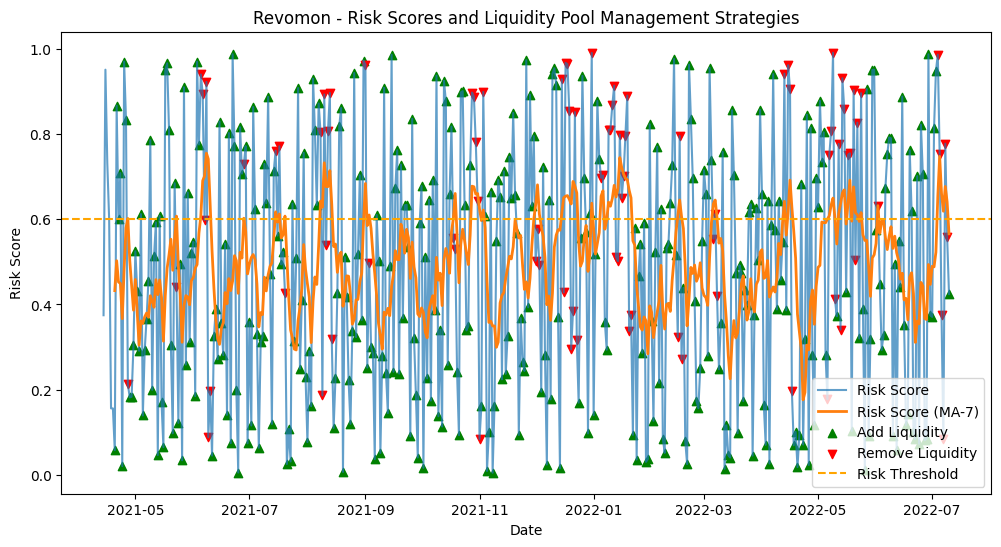

<ipython-input-52-02adb1e259c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['Date'] = pd.to_datetime(coin_rows['Date'])
<ipython-input-52-02adb1e259c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['RiskScore'] = risk_scores
<ipython-input-52-02adb1e259c4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

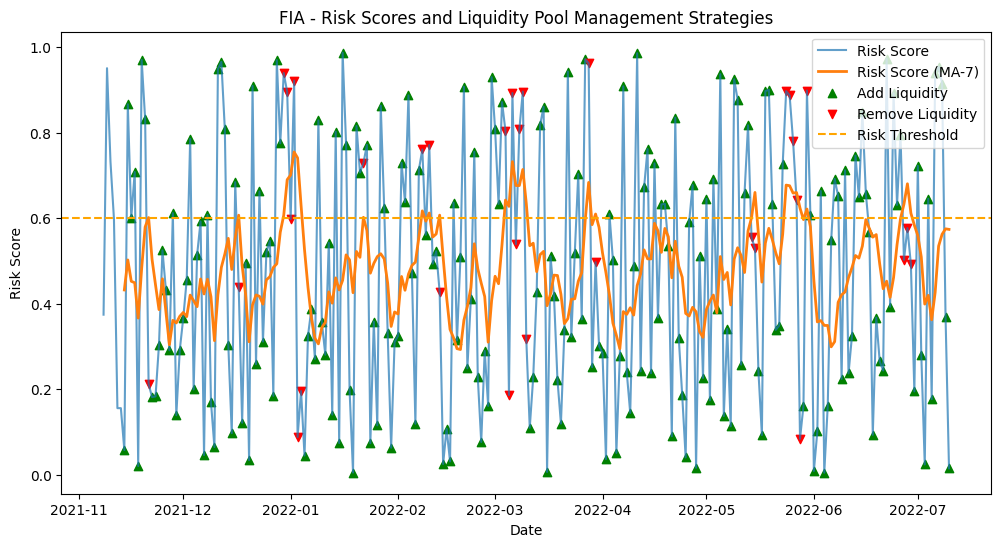

<ipython-input-52-02adb1e259c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['Date'] = pd.to_datetime(coin_rows['Date'])
<ipython-input-52-02adb1e259c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['RiskScore'] = risk_scores
<ipython-input-52-02adb1e259c4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

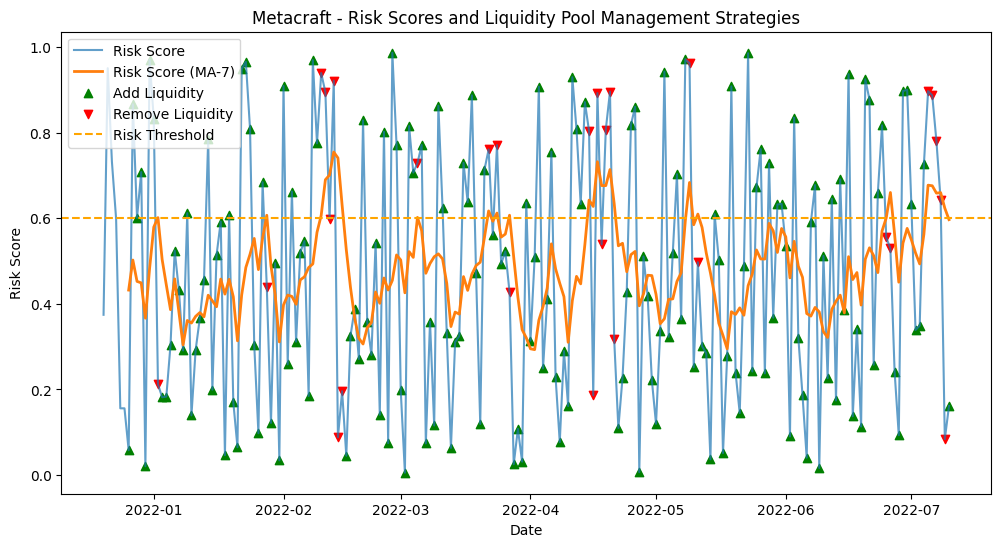

<ipython-input-52-02adb1e259c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['Date'] = pd.to_datetime(coin_rows['Date'])
<ipython-input-52-02adb1e259c4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin_rows['RiskScore'] = risk_scores
<ipython-input-52-02adb1e259c4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

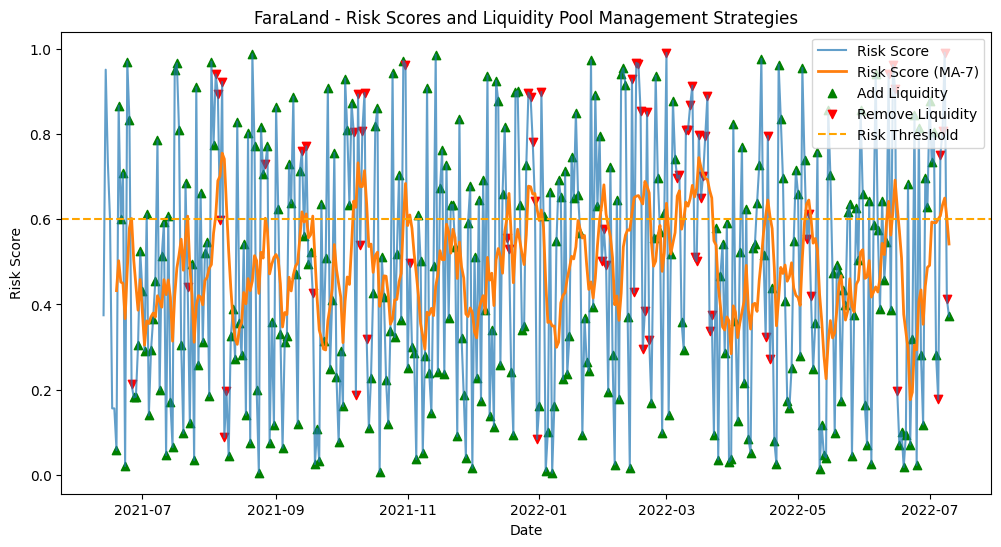

In [52]:
# Randomly select five coins
selected_coins = random.sample(coins, 5)

# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Convert 'Date' column to datetime format
    coin_rows['Date'] = pd.to_datetime(coin_rows['Date'])

    # Define parameters
    risk_threshold = 0.6  # Adjust as needed
    moving_average_window = 7  # Adjust as needed

    # Assuming you have risk scores from your risk prediction model stored in 'risk_scores' variable
    # In this example, we'll generate synthetic risk scores for illustration purposes
    np.random.seed(42)
    risk_scores = np.random.rand(len(coin_rows))

    # Generate synthetic 'Risk' column based on the threshold
    coin_rows['RiskScore'] = risk_scores

    # Calculate a simple moving average of 'RiskScore' to smooth the signal
    coin_rows['RiskScore_MA'] = coin_rows['RiskScore'].rolling(window=moving_average_window).mean()

    # Define liquidity pool management strategies
    def add_liquidity_strategy(df, threshold):
        df.loc[df['RiskScore_MA'] < threshold, 'Action'] = 'Add Liquidity'

    def remove_liquidity_strategy(df, threshold):
        df.loc[df['RiskScore_MA'] >= threshold, 'Action'] = 'Remove Liquidity'

    # Apply liquidity pool management strategies
    add_liquidity_strategy(coin_rows, risk_threshold)
    remove_liquidity_strategy(coin_rows, risk_threshold)

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(coin_rows['Date'], coin_rows['RiskScore'], label='Risk Score', alpha=0.7)
    plt.plot(coin_rows['Date'], coin_rows['RiskScore_MA'], label=f'Risk Score (MA-{moving_average_window})', linewidth=2)
    plt.scatter(coin_rows[coin_rows['Action'] == 'Add Liquidity']['Date'], coin_rows[coin_rows['Action'] == 'Add Liquidity']['RiskScore'], color='green', label='Add Liquidity', marker='^')
    plt.scatter(coin_rows[coin_rows['Action'] == 'Remove Liquidity']['Date'], coin_rows[coin_rows['Action'] == 'Remove Liquidity']['RiskScore'], color='red', label='Remove Liquidity', marker='v')
    plt.axhline(y=risk_threshold, color='orange', linestyle='--', label='Risk Threshold')
    plt.title(f'{coin} - Risk Scores and Liquidity Pool Management Strategies')
    plt.xlabel('Date')
    plt.ylabel('Risk Score')
    plt.legend()
    plt.show()


## Backtesting returns analysis of the model

<ipython-input-91-09a657f06676>:73: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-91-09a657f06676>:79: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-91-09a657f06676>:83: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-91-09a657f06676>:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

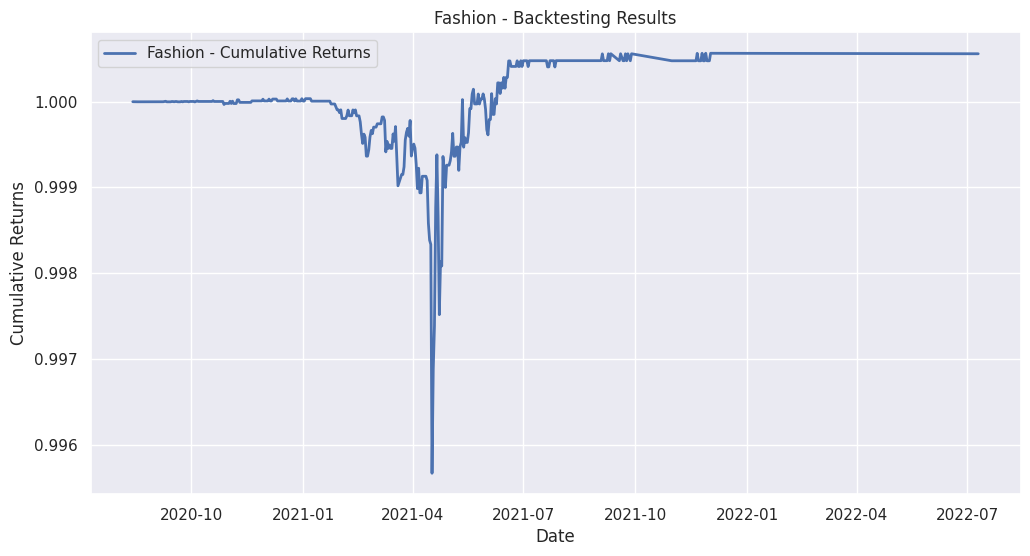

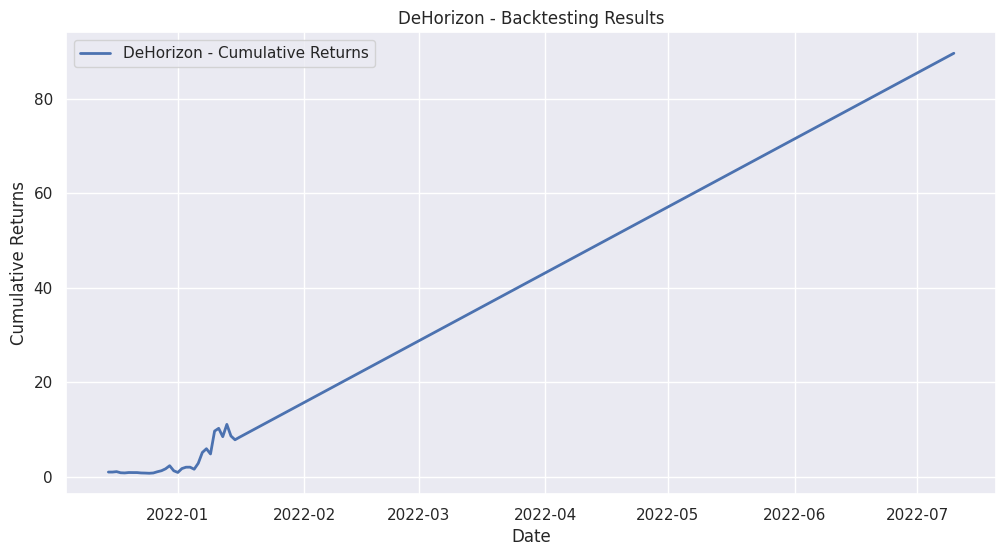

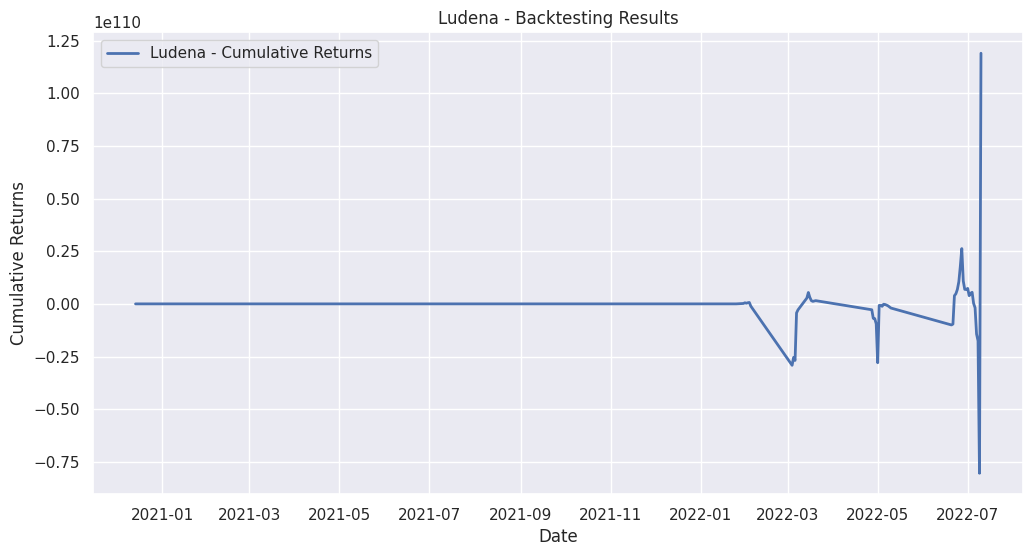

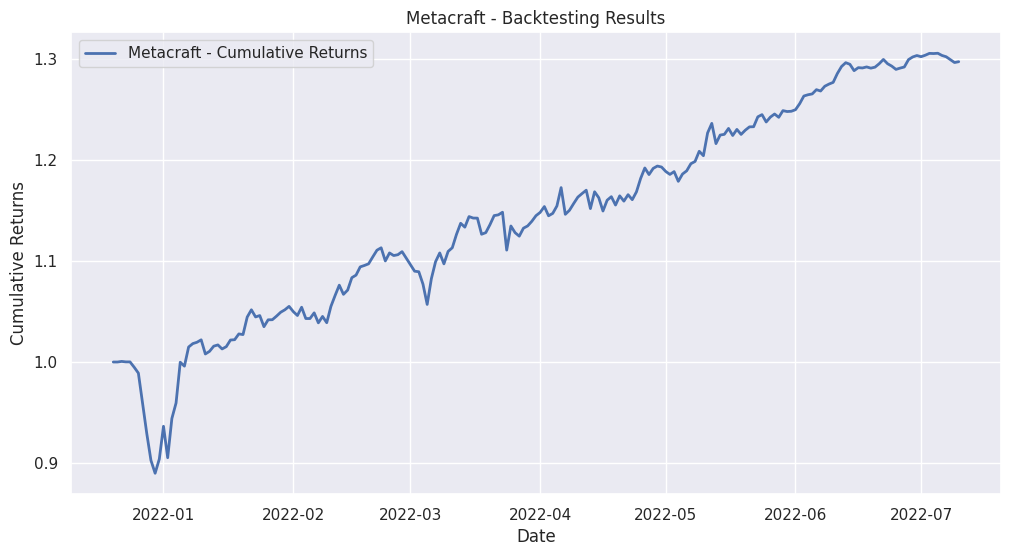

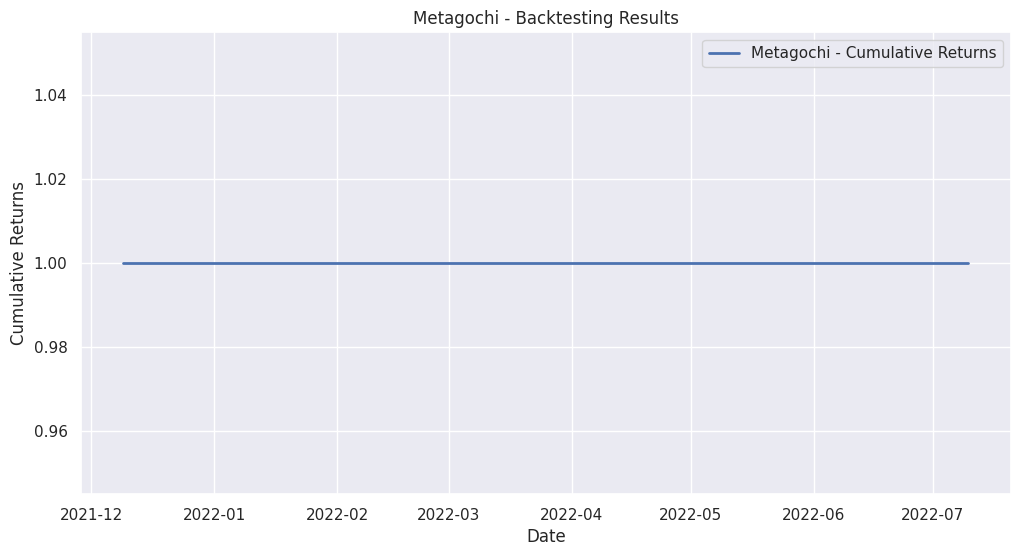

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming df is your DataFrame containing the data
coins=['Metafity', 'Aniverse', 'SHiBGOTCHi', 'Polker.Game', 'Metaxa',
       'Highstreet', 'Flokiverse', 'FIA', 'Monavale', 'SouloCoin',
       'Pegaxy', 'Got', 'Meta', 'DeNations', 'METAFLIP', 'ShoeFy',
       'BicycleFi', 'SpookyShiba', 'Asva', 'Dope', 'EnterDAO',
       'Kyberdyne', 'TCGCoin', 'MagicCraft', 'BattleVerse', 'Billionaire',
       'Favor', 'TaleCraft', 'DAO', 'Drive', 'Battle', 'ASSAPLAY',
       'CanaBoyz', 'RFOX', 'F5', 'BlockchainSpace', 'Kaby',
       'Decentraland', 'Dvision', 'Metastrike', 'Community', 'Rens',
       'Dreamverse', 'Realm', 'GooRide', 'My', 'Revomon', 'Metaverse',
       'Ethermon', 'MetaCars', 'Defira', 'SYA', 'Atlantis', 'Beeuda',
       'Gamium', 'KAINET', 'GemUni', 'Metavault', 'StarMon', 'DopeWarz',
       'Howl', 'HiFi', 'Metacraft', 'BOSAGORA', 'Ethverse', 'Sensorium',
       'Arcona', 'StarkMeta', 'Alien', 'Tari', 'Rici', 'Gamebox', 'QUINT',
       'Drawshop', 'Sports', 'Jade', 'Blockchain', 'Tank', 'MOBLAND',
       'AFKDAO', 'Light', 'AtEM', 'Somnium', 'MetaSpace', 'Cens', 'Arker',
       'PlayDapp', 'MetaMounts', 'POLYSPORTS', 'Play', 'Bullieverse',
       'Multiverse', 'ETHEKing', 'Defina', 'LuckyMeta', 'Metagalaxy',
       'Shibnobi', 'Strip', 'DNAxCAT', 'AstroGrow', 'SIF', 'MStation',
       'The', 'Affyn', 'MetaVPad', 'Heroes', 'Moon', 'Islandswap',
       'American', 'Laqira', 'Altura', 'FunFi', 'Huny', 'Lovelace', 'ALI',
       'Jenny', 'MetaUFO', 'FlappyDoge', 'StarLink', 'DeepSpace',
       'KlayCity', 'Cats', 'CropBytes', 'Cardiocoin', 'Aavegotchi',
       'Mist', 'Kryxivia', 'Enjin', 'Krypto', 'GameCredits', 'Onston',
       'Kawaii', '9D', 'SpaceFalcon', 'Playermon', 'GridZone.io',
       'MeganSwap', 'Content', 'Lego', 'Decentral', 'MetaWars',
       'LambSwap', 'BODA', 'OneRare', 'ASIX', 'Polytrade', 'Propel',
       'SOMESING', 'Ancient', 'DeHorizon', 'Lepasa', 'AdShares', 'SIDUS',
       'H3RO3S', 'HyperVerse', 'Spheroid', 'MetaMerge', 'MARS4', 'Duckie',
       '7Pixels', 'CyberDragon', 'ClassicDoge', 'Solice', 'DeFi', 'Bean',
       'RaceFi', 'Graviton', 'Puzzle', 'Efinity', 'BoomSpace', 'Rangers',
       'Magic', 'Sinverse', 'Crystal', 'Metagochi', 'Metaverse-Dao',
       'KAKA', 'Shirtum', 'Netvrk', 'GalaxyPad', 'Epik', 'LOCGame', 'OVR',
       'MetaOneVerse', 'SatoshiCity', 'Flokimooni', 'Luffy', 'Hydraverse',
       'SolDate', 'DEEPSPACE', 'PolkaWar', 'Aurory', 'CryptoWar',
       'Binopoly', '1BOX', 'Lelouch', 'Torum', 'MyWorld', 'Bloktopia',
       'RMRK', 'Axie', 'Radio', 'StarSharks', 'Metawear', 'Nano', 'SPACE',
       'MagicBox', 'Metagames', 'Fellaz', 'NELO', 'Karmaverse',
       'FireStarter', 'Astro', 'Star', 'Black', 'HydraMeta', 'Neos',
       'Adroverse', 'KingdomX', 'Doecoin', 'OneArt', 'Fashion', 'ELEF',
       'Planet', 'ARize', 'Age', 'NextEarth', 'Boson', 'Chronicle',
       'Meland.ai', 'FidoMeta', 'MINE', 'Ark', 'FaraLand', 'Endless',
       'Sway', 'Equilibrium', 'Avocado', 'LogiTron', 'Elvantis',
       'Cryptopolis', 'Burn', 'Metapad', 'Crypto', 'Gametree', 'Kalissa',
       'Dragon', 'ENTERBUTTON', 'Moniwar', 'Qfora', 'Sekuya', 'MangaMon',
       'Medacoin', 'Avaxtars', 'Sakura', 'Metabank', 'GameStar', 'Ludena',
       'DoKEN', 'CryptoPlanes', 'Realy', 'PolkaCity', 'CEEK', 'Elemon',
       'Enjinstarter', 'Meli', 'MooMonster', 'SIGNIN', 'TomTom',
       'MetaShib', 'AcknoLedger', 'LaEeb', 'MetaFabric', 'Fistiana',
       'Hellsing', 'Crabada', 'Kalao', 'BITMIC', 'Monsta', 'DragonMaster',
       'KeySwap', 'CryptoCars', 'CronosVerse', 'Legend', 'Chimeras',
       'MetaCos', 'HappyLand', 'SHILL', 'WidiLand', 'Tower', 'Town',
       'Vault', 'Wilder', 'Zone', 'X', 'Victoria', 'Virtual', 'Verasity',
       'Xaya', 'WEMIX', 'VCGamers', 'Velhalla', 'VR', 'Totem',
       'XCarnival', 'Yield', 'Warena', 'UFO', 'Vulcan', 'Wonderman',
       'Wakanda', 'Wizardia', 'bePAY', 'UniX', 'XRUN', 'Vita', 'vEmpire',
       'ZENFI']

# Randomly select five coins
selected_coins = random.sample(coins, 5)

# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Simulate a trading environment
    coin_rows['Position'] = 0  # Initialize position to 0 (no liquidity provision)

    # Backtest the strategy
    for i in range(1, len(coin_rows)):
        # Simulate adding liquidity
        if coin_rows['Action'].iloc[i] == 'Add Liquidity':
            coin_rows['Position'].iloc[i] = coin_rows['Position'].iloc[i - 1] + 1

        # Simulate removing liquidity
        elif coin_rows['Action'].iloc[i] == 'Remove Liquidity':
            coin_rows['Position'].iloc[i] = coin_rows['Position'].iloc[i - 1] - 1

    # Calculate daily returns based on position changes
    coin_rows['Returns'] = coin_rows['Close'].pct_change() * coin_rows['Position'].shift()

    # Calculate cumulative returns
    coin_rows['CumulativeReturns'] = (1 + coin_rows['Returns']).cumprod()

    # Handle potential issues with infinite values in cumulative returns
    coin_rows['CumulativeReturns'].replace([np.inf, -np.inf], np.nan, inplace=True)
    coin_rows['CumulativeReturns'].fillna(1, inplace=True)

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.plot(coin_rows['CumulativeReturns'], label=f'{coin} - Cumulative Returns', linewidth=2)
    plt.title(f'{coin} - Backtesting Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()



### Risk Model Consists of ImpermanentLoss,Risk Score, Risk moving average, Action and position need to taken to mange the liquidity and Returns

In [ ]:
df

,Open,High,Low,Close,Volume,Currency,coins,ImpermanentLoss,Risk,Risk_MA,Action,Position,Returns,CumulativeReturns
Date,,,,,,,,,,,,,,
2020-09-12,-0.059643,-0.062121,-0.055391,-0.060554,-0.083149,USD,Metafity,-0.014586,0,NaN,NaN,0,NaN,1.0
2020-09-13,-0.060627,-0.062580,-0.055993,-0.060261,-0.083166,USD,Metafity,0.004117,1,NaN,NaN,0,-0.000000,1.0
2020-09-14,-0.060388,-0.061629,-0.055545,-0.059611,-0.083174,USD,Metafity,0.009095,1,NaN,NaN,0,-0.000000,1.0
2020-09-15,-0.059760,-0.062257,-0.056295,-0.060182,-0.083151,USD,Metafity,-0.007919,0,NaN,NaN,0,0.000000,1.0
2020-09-16,-0.060309,-0.062336,-0.055771,-0.059822,-0.083160,USD,Metafity,0.005038,0,NaN,NaN,0,-0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,-0.131743,-0.126004,-0.131257,-0.131735,-0.083327,USD,ZENFI,0.022005,0,0.285714,Add Liquidity,95377,-0.217674,1.0
2022-07-07,-0.131743,-0.126006,-0.131256,-0.131738,-0.083363,USD,ZENFI,-0.167464,0,0.285714,Add Liquidity,95378,1.693043,1.0
2022-07-08,-0.131745,-0.126006,-0.131258,-0.131738,-0.083364,USD,ZENFI,-0.022989,0,0.285714,Add Liquidity,95379,0.193489,1.0


## Predicting Risk Score and New Liquidity

In [ ]:
import numpy as np
import random

# Example function to standardize and reshape features for prediction
def predict_risk(features, scaler, model):
    standardized_features = scaler.transform(features)
    reshaped_features = standardized_features.reshape((1, 1, standardized_features.shape[1]))
    risk_score = model.predict(reshaped_features)
    return risk_score[0, 0]  # Assuming the model output is a single scalar value

# Example function to manage liquidity based on risk predictions
def manage_liquidity(risk_score, current_liquidity):
    # Your logic for adjusting liquidity based on risk predictions
    # This is a simplified example; you may want to implement a more sophisticated strategy
    if risk_score > 0.5:
        return current_liquidity * 0.9  # Reduce liquidity if the risk is high
    else:
        return current_liquidity * 1.1  # Increase liquidity if the risk is low

# Randomly select five coins
selected_coins = random.sample(coins, 5)

# Iterate through selected coins
for coin in selected_coins:
    # Select rows for the current coin
    coin_rows = df[df['coins'] == coin]

    # Example of using the functions
    current_liquidity = 100000  # Initial liquidity
    new_features = np.array([coin_rows[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[-1]])  # Replace with actual features

    # Assuming 'scaler' and 'model' are pre-defined
    risk_score = predict_risk(new_features, scaler, model)
    new_liquidity = manage_liquidity(risk_score, current_liquidity)

    print(f"\nCoin: {coin}")
    print(f"Current Liquidity: {current_liquidity}")
    print(f"Risk Score: {risk_score}")
    print(f"New Liquidity: {new_liquidity}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 292ms/step

Coin: RaceFi
Current Liquidity: 100000
Risk Score: 0.34808146953582764
New Liquidity: 110000.00000000001

1/1 [==============================] - 0s 33ms/step

Coin: Monavale
Current Liquidity: 100000
Risk Score: 1.9239379867030948e-07
New Liquidity: 110000.00000000001



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 34ms/step

Coin: Fashion
Current Liquidity: 100000
Risk Score: 0.4451650381088257
New Liquidity: 110000.00000000001

1/1 [==============================] - 0s 50ms/step

Coin: Endless
Current Liquidity: 100000
Risk Score: 0.4918583333492279
New Liquidity: 110000.00000000001



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 33ms/step

Coin: Metaxa
Current Liquidity: 100000
Risk Score: 0.4451720416545868
New Liquidity: 110000.00000000001

